# Capstone2 - 3 Pre-processing and Training Data Development & Modeling

# 3.1 Imports 

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [51]:
!pip install holidays

In [52]:
!pip install prophet

In [53]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import itertools
import holidays
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from IPython.display import clear_output
from tqdm import tqdm
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# 3.2 Load Data

In [56]:
orders = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\orders')

In [57]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                        product_id  \
0                    2017-10-18  87285b34884572647811a353c7ac498a   
1                    2018-08-13  595fac2a385ac33a80bd5114aec74eb8   
2                    2018-09-04  aa4383b373c6aca5d8797843e5594415   
3                    2017-12-15  d0b61bfb1de832b15ba9d266ca96e5b0   
4                    2018-02-26  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id  ... seller_zip_code_prefix  \
0  3504c0cb71d7fa48d967e0e4c94d59d9  ...                 9350.0   
1  289cdb325fb7e7f891c38608bf9e0962  ...                31570.0   
2  4869f7a5dfa277a7dca6462dcf3b52b2  ...                14840.0   
3  66922902710d126a0e7d26b0e3805106  ...                31842.0   
4  2c9e548be18521d1c43cde1c582c6de8  ...                 8752.0   

       seller_city  seller_state product_category_name_english  order_size  \
0             maua            SP                    housewares           1   
1   belo horizonte            SP                     perfumery           1   
2          guariba            SP                          auto           1   
3   belo horizonte            MG                      pet_shop           1   
4  mogi das cruzes            SP                    stationery           1   

  product_order_size  Year  Month product_sales_amt order_sales_amt  
0                1.0  2017     10             29.99           29.99  
1                1.0  2018      7            118.70          118.70  
2                1.0  2018      8            159.90          159.90  
3                1.0  2017     11             45.00           45.00  
4                1.0  2018      2             19.90           19.90  

[5 rows x 27 columns]

In [58]:
orders.shape

(102425, 27)

In [59]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102425 non-null  object 
 1   customer_id                    102425 non-null  object 
 2   order_status                   102425 non-null  object 
 3   order_purchase_timestamp       102425 non-null  object 
 4   order_approved_at              102411 non-null  object 
 5   order_delivered_carrier_date   101397 non-null  object 
 6   order_delivered_customer_date  100195 non-null  object 
 7   order_estimated_delivery_date  102425 non-null  object 
 8   product_id                     102425 non-null  object 
 9   seller_id                      102425 non-null  object 
 10  shipping_limit_date            102425 non-null  object 
 11  price                          102425 non-null  float64
 12  freight_value                 

# 3.3 Explore the data

##### Drop the columns that contain missing values

In [61]:
orders = orders.drop(columns = {'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'})

##### Drop any columns that are not required for analysis.

In [63]:
orders = orders.drop(columns = {'shipping_limit_date'})

###### Replace any missing values with the name of a new product category

In [64]:
missing = pd.concat([orders.isnull().sum(), 100 * orders.isnull().mean()], axis=1)
missing.columns=['count', '%']
print(missing.sort_values('%',ascending=False))

                               count         %
product_category_name_english   1460  1.425433
order_id                           0  0.000000
customer_state                     0  0.000000
product_sales_amt                  0  0.000000
Month                              0  0.000000
Year                               0  0.000000
product_order_size                 0  0.000000
order_size                         0  0.000000
seller_state                       0  0.000000
seller_city                        0  0.000000
seller_zip_code_prefix             0  0.000000
customer_city                      0  0.000000
customer_id                        0  0.000000
customer_zip_code_prefix           0  0.000000
customer_unique_id                 0  0.000000
freight_value                      0  0.000000
price                              0  0.000000
seller_id                          0  0.000000
product_id                         0  0.000000
order_estimated_delivery_date      0  0.000000
order_purchas

In [65]:
orders['product_category_name_english'] = orders['product_category_name_english'].fillna('unknown')

In [66]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102425 non-null  object 
 1   customer_id                    102425 non-null  object 
 2   order_status                   102425 non-null  object 
 3   order_purchase_timestamp       102425 non-null  object 
 4   order_estimated_delivery_date  102425 non-null  object 
 5   product_id                     102425 non-null  object 
 6   seller_id                      102425 non-null  object 
 7   price                          102425 non-null  float64
 8   freight_value                  102425 non-null  float64
 9   customer_unique_id             102425 non-null  object 
 10  customer_zip_code_prefix       102425 non-null  int64  
 11  customer_city                  102425 non-null  object 
 12  customer_state                

##### Add 'day' columns and drop 'order_purchase_timestamp'

In [67]:
orders['day'] = orders['order_purchase_timestamp'].astype(str).str[8:10]

#### Filter 2017/01 ~2018/07 data

In [68]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders = orders[(orders['order_purchase_timestamp']>=pd.to_datetime('2017-01-01')) & (orders['order_purchase_timestamp']<=pd.to_datetime('2018-08-20'))]
orders = orders[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']]
orders = orders[orders['order_status'].isin(['shipped','delivered','invoiced'])]
orders['date'] = orders['order_purchase_timestamp'].dt.date

In [69]:
orders = orders.groupby('date').agg(total_orders=('order_id', 'nunique')).reset_index()

In [70]:
orders['date'] = pd.to_datetime(orders['date'])
orders['dayofweek'] = orders['date'].dt.dayofweek
orders['quarter'] = orders['date'].dt.quarter
orders['month'] = orders['date'].dt.month
orders['year'] = orders['date'].dt.year
orders['dayofyear'] = orders['date'].dt.dayofyear
orders['dayofmonth'] = orders['date'].dt.day
orders['weekofyear'] = orders['date'].dt.weekofyear

C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_7732\2606553907.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  orders['weekofyear'] = orders['date'].dt.weekofyear


In [71]:
# add holidays information to the data
br_holidays = holidays.BR()
orders['events'] = orders['date'].apply(lambda x: br_holidays.get(x))

In [72]:
orders.loc[orders['date']==pd.to_datetime('2017-11-24'), 'events'] = 'black friday'

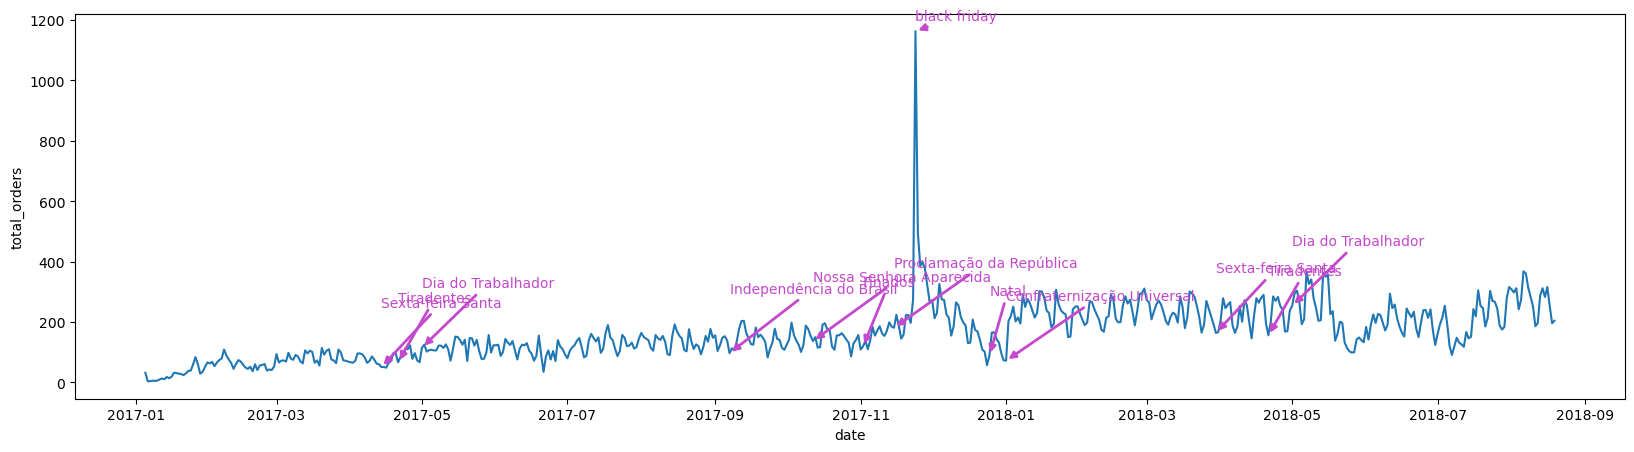

In [73]:
ann_color = '#c449cc' # annotation color
arrowprops=dict(arrowstyle='-|>', color=ann_color, linewidth=2)
plt.figure(figsize=(20,5))
sns.lineplot(data=orders, x='date', y='total_orders')

events = orders[orders['events'].notna()].to_dict('records')
for event in events:
    plt.annotate(event['events'], 
                xy=(event['date'], event['total_orders']), # arrow position (x, y)
                xytext=(event['date'], min(event['total_orders'] + 200, 1200)), # text position (x, y)
                fontsize=10,
                arrowprops=arrowprops,
                color=ann_color)

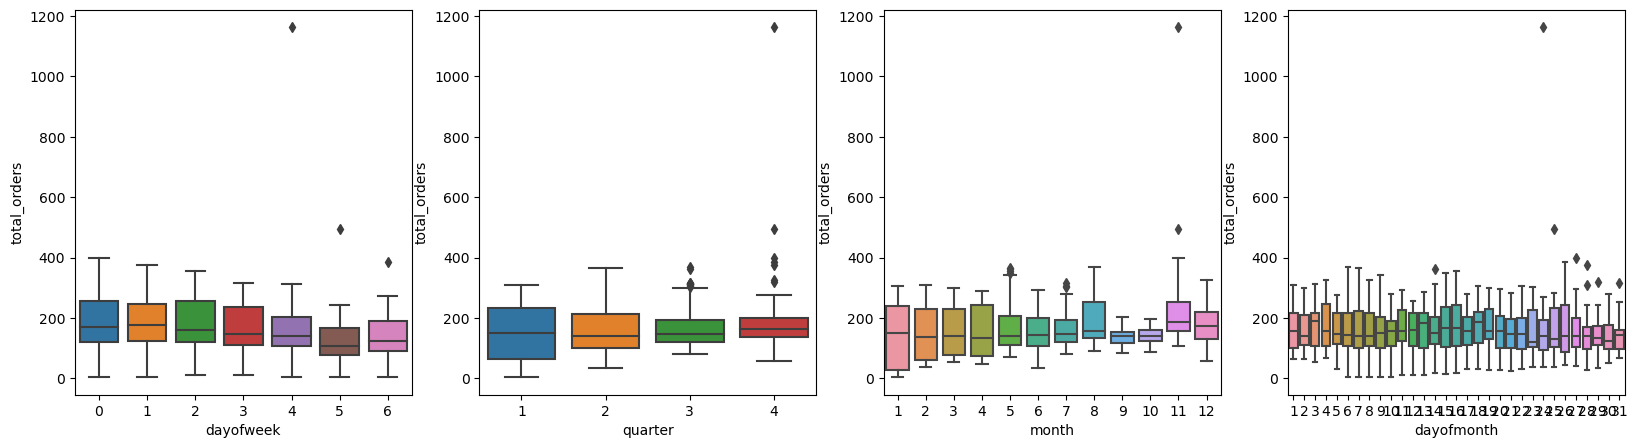

In [74]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
for idx, col in enumerate(['dayofweek', 'quarter', 'month', 'dayofmonth']):
    sns.boxplot(data=orders, x=col, y='total_orders', ax=ax[idx])

# 3.4 Data Preprocessing¶

#### Min-Max Scaler

In [75]:
dates = orders['date'].sort_values().unique()
num_dates = len(dates)
dates_train = dates[:int(0.8*num_dates)]
dates_test = dates[int(0.8*num_dates):]
train = orders[orders['date'].isin(dates_train)]
test = orders[orders['date'].isin(dates_test)]

In [76]:
scaler = MinMaxScaler()
scaler.fit(train[['total_orders']])
train['scaling'] = scaler.transform(train[['total_orders']])
test['scaling'] = scaler.transform(test[['total_orders']])

C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_7732\2471818048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['scaling'] = scaler.transform(train[['total_orders']])
C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_7732\2471818048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['scaling'] = scaler.transform(test[['total_orders']])


In [77]:
train['rmv_outliers'] = winsorize(train['scaling'], (0.01,0.009))

C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_7732\602262428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['rmv_outliers'] = winsorize(train['scaling'], (0.01,0.009))


In [78]:
winsorized_min, winsorized_max = train[train['rmv_outliers']!=train['scaling']]['rmv_outliers'].min(), train[train['rmv_outliers']!=train['scaling']]['rmv_outliers'].max()
winsorized_min, winsorized_max

(0.0017256255392579813, 0.3201035375323555)

In [79]:
test.loc[test['scaling']>winsorized_max, 'rmv_outliers'] = winsorized_max
test.loc[test['scaling']<winsorized_min, 'rmv_outliers'] = winsorized_min
test.loc[(test['scaling']>=winsorized_min)&(test['scaling']<=winsorized_max), 'rmv_outliers'] = test[(test['scaling']>=winsorized_min)&(test['scaling']<=winsorized_max)]['scaling']

C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_7732\1080229728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[test['scaling']>winsorized_max, 'rmv_outliers'] = winsorized_max
C:\Users\JIYOON JUNG\AppData\Local\Temp\ipykernel_7732\1080229728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[(test['scaling']>=winsorized_min)&(test['scaling']<=winsorized_max), 'rmv_outliers'] = test[(test['scaling']>=winsorized_min)&(test['scaling']<=winsorized_max)]['scaling']


In [80]:
def plot_evaluation(dataset):
    fig, ax = plt.subplots(1,4,figsize=(20,5))
    for idx, col in enumerate(['dayofweek', 'quarter', 'month', 'dayofmonth']):
        plot_data = dataset.groupby(col)['squared_error'].mean().apply(np.sqrt).reset_index()
        sns.barplot(data=plot_data, x=col, y='squared_error', ax=ax[idx], color='orange')
        ax[idx].set_ylabel('RMSE')

    fig, ax = plt.subplots(1,2,figsize=(20,3))
    plot_data = dataset.groupby(['y','yhat'])['squared_error'].mean().apply(np.sqrt).reset_index()
    sns.scatterplot(data=plot_data, x='y', y='yhat', ax=ax[0], color='black')
    sns.scatterplot(data=plot_data, x='y', y='squared_error', ax=ax[1], color='black')
    ax[0].set_title("Correlation between actual and predicted sales")
    ax[0].set_xlabel('Actual Value')
    ax[0].set_ylabel('Predicted Value')
    ax[1].set_xlabel('Actual Value')
    ax[1].set_ylabel('RMSE')
    ax[1].set_title("Correlation between actual and RMSE")
    plt.show()

In [81]:
def plot_time_series(dataset):
    plt.figure(figsize=(20,5))
    ax = sns.lineplot(x='ds', y='yhat', data=dataset, label='train predicted', color='orange')
    ax.fill_between(dataset['ds'], dataset['yhat_lower'], dataset['yhat_upper'], alpha=0.2)
    sns.lineplot(x='ds', y='y', data=dataset, label='train actual', color='black')
    plt.title("Time Series Plot Actual vs Predicted")
    plt.show()

In [82]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

holidays = orders[orders['events'].notna()][['date','events']]
holidays[['lower_window', 'upper_window']] = [-7, 7]
holidays = holidays.rename(columns={'date':'ds','events':'holiday'})

def predict_eval(train, test, variant, tuning=False, holiday_context=False):
    dataset = train.copy()
    dataset_test = test.copy()
    col = {'date':'ds', variant:'y'}
    dataset = dataset.rename(columns=col)
    dataset_test = dataset_test.rename(columns=col)
    m = Prophet()
    
    if holiday_context:
        m = Prophet(holidays = holidays)
        m.add_country_holidays(country_name='BR')
    
    if tuning:
        # Generate all combinations of parameters
        all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
        rmses = []  # Store the RMSEs for each params here

        # Use cross validation to evaluate all parameters
        print("cross_validation")
        for params in tqdm(all_params):
            if holiday_context:
                m = Prophet(**params).fit(dataset)  # Fit model with given params
            else:
                m = Prophet(holidays=holidays, **params).fit(dataset)
            df_cv = cross_validation(model=m, initial='200 days', period='30 days', horizon = '30 days', parallel="processes")
            df_p = performance_metrics(df_cv, rolling_window=1)
            rmses.append(df_p['rmse'].values[0])
        clear_output()
        best_params = all_params[np.argmin(rmses)]
        print(best_params)
        if holiday_context:
            m = Prophet(holidays=holidays, changepoint_prior_scale=best_params['changepoint_prior_scale'], seasonality_prior_scale=best_params['seasonality_prior_scale'], seasonality_mode=best_params['seasonality_mode'])
        else:
            m = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], seasonality_prior_scale=best_params['seasonality_prior_scale'], seasonality_mode=best_params['seasonality_mode'])

    m.fit(dataset)
    future = pd.DataFrame(dates_test, columns=['ds'])
    forecast = m.predict(future)
    forecast_today = m.predict(dataset)
    
    if variant in ['scaling', 'rmv_outliers']:
        forecast[['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 
              'additive_terms', 'additive_terms_lower', 'additive_terms_upper','weekly', 
              'weekly_lower', 'weekly_upper', 'multiplicative_terms_upper', 'yhat']] = scaler.inverse_transform(
            forecast[['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 
                      'additive_terms_lower', 'additive_terms_upper','weekly', 'weekly_lower', 
                      'weekly_upper', 'multiplicative_terms_upper', 'yhat']])

        forecast_today[['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 
              'additive_terms', 'additive_terms_lower', 'additive_terms_upper','weekly', 
              'weekly_lower', 'weekly_upper', 'multiplicative_terms_upper', 'yhat']] = scaler.inverse_transform(
            forecast_today[['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 
                            'additive_terms_lower', 'additive_terms_upper','weekly', 'weekly_lower', 
                            'weekly_upper', 'multiplicative_terms_upper', 'yhat']])
        dataset['y'] = scaler.inverse_transform(dataset[['y']])
        dataset_test['y'] = scaler.inverse_transform(dataset_test[['y']])

    forecast_today.index = dataset.index
    dataset[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_today[['yhat', 'yhat_lower', 'yhat_upper']]
    dataset['squared_error'] = np.square(dataset['y'] - dataset['yhat'])

    print("Train dataset evaluation")
    print(f"RMSE: {np.sqrt(dataset['squared_error'].mean())}")
    plot_time_series(dataset)
    plot_evaluation(dataset)

    forecast.index = dataset_test.index
    dataset_test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
    dataset_test['squared_error'] = np.square(dataset_test['y'] - dataset_test['yhat'])

    print("Test dataset evaluation")
    print(f"RMSE: {np.sqrt(dataset_test['squared_error'].mean())}")
    plot_time_series(dataset_test)
    plot_evaluation(dataset_test)

15:51:58 - cmdstanpy - INFO - Chain [1] start processing
15:51:58 - cmdstanpy - INFO - Chain [1] done processing


Train dataset evaluation
RMSE: 58.98732950399085


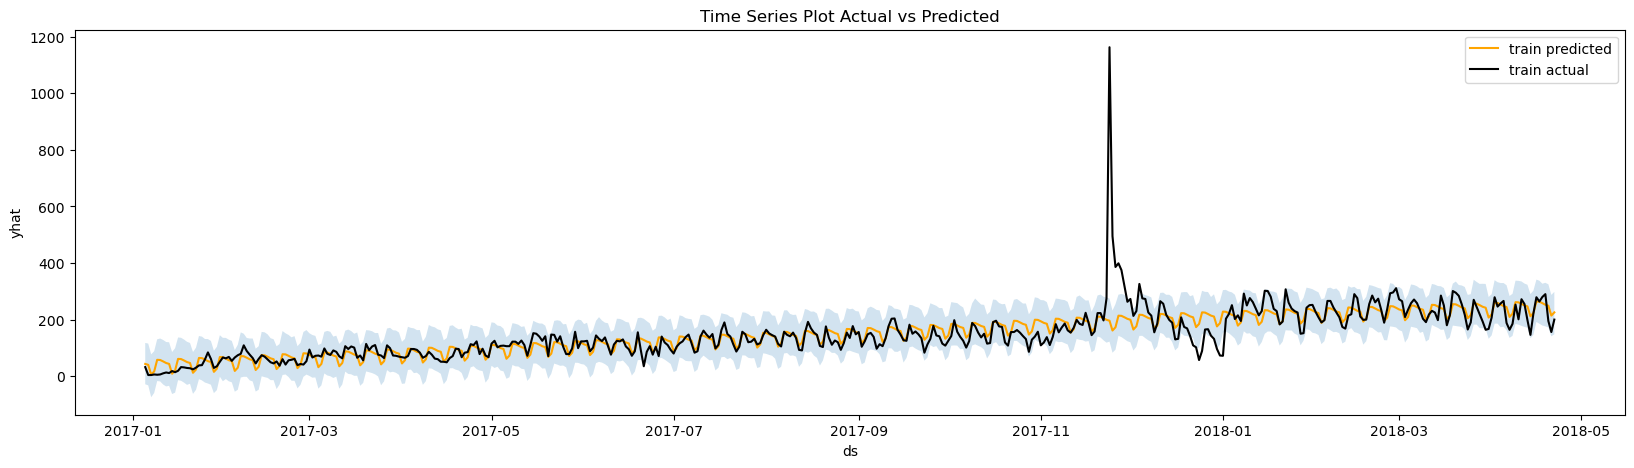

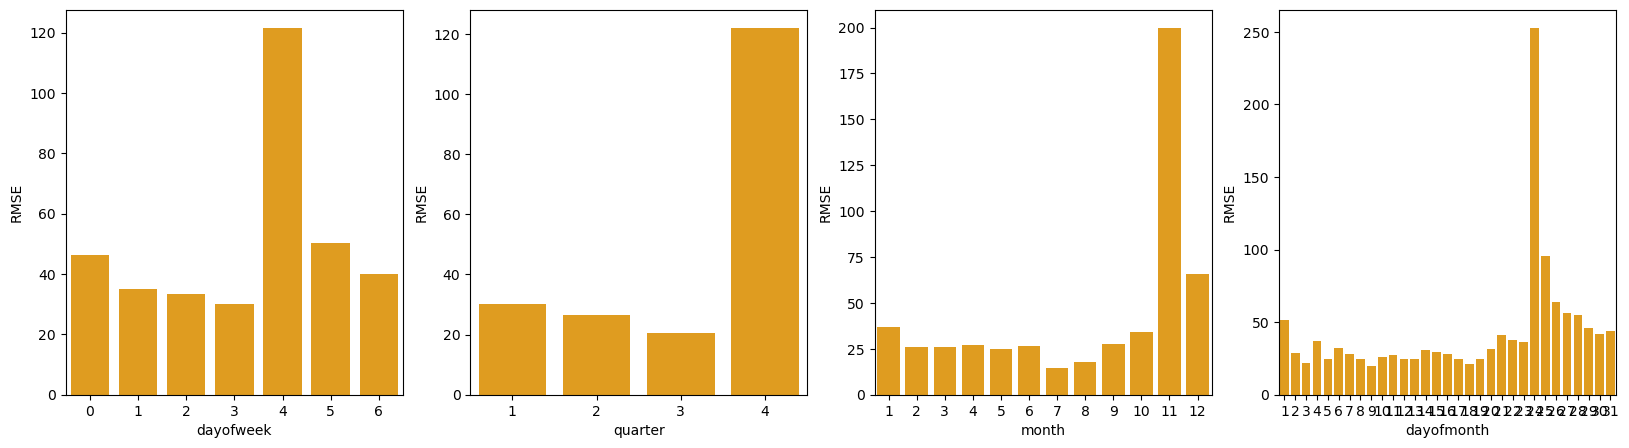

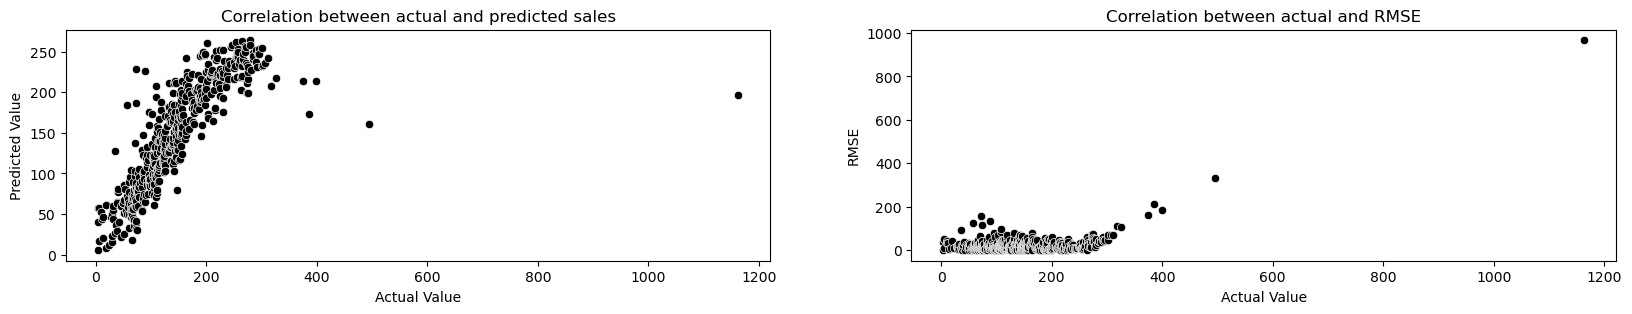

Test dataset evaluation
RMSE: 75.14704534885301


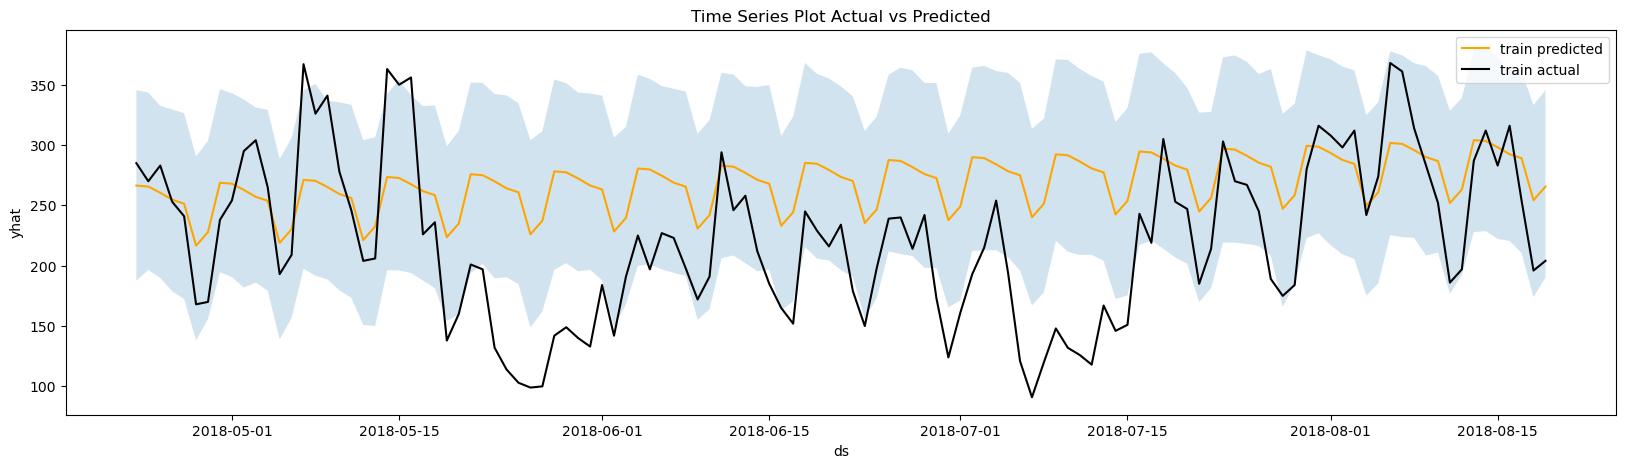

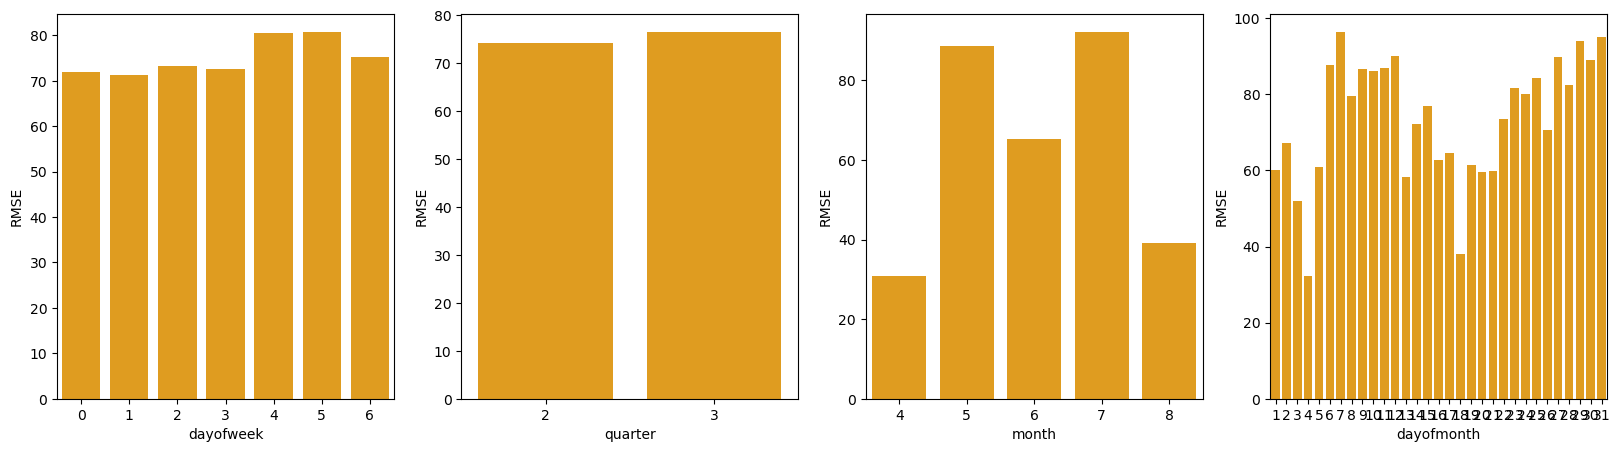

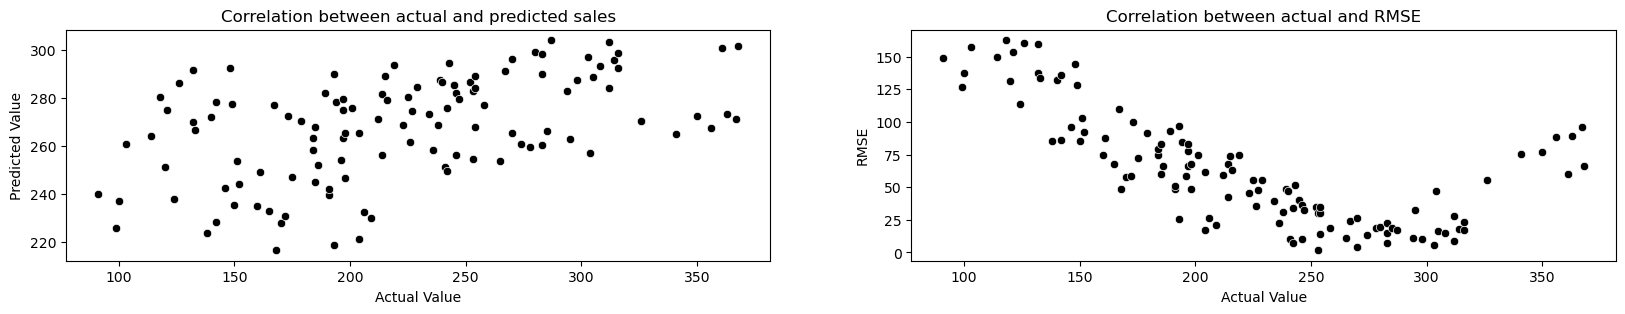

In [83]:
predict_eval(train, test, 'total_orders')

15:52:40 - cmdstanpy - INFO - Chain [1] start processing
15:52:40 - cmdstanpy - INFO - Chain [1] done processing


Train dataset evaluation
RMSE: 58.99223970273529


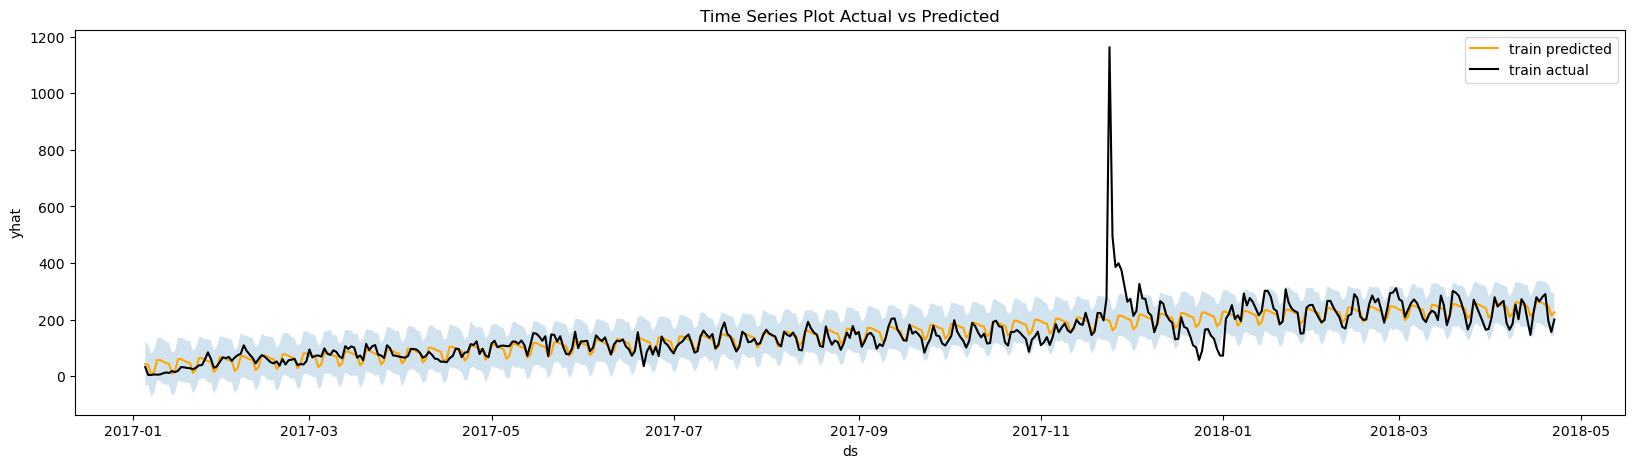

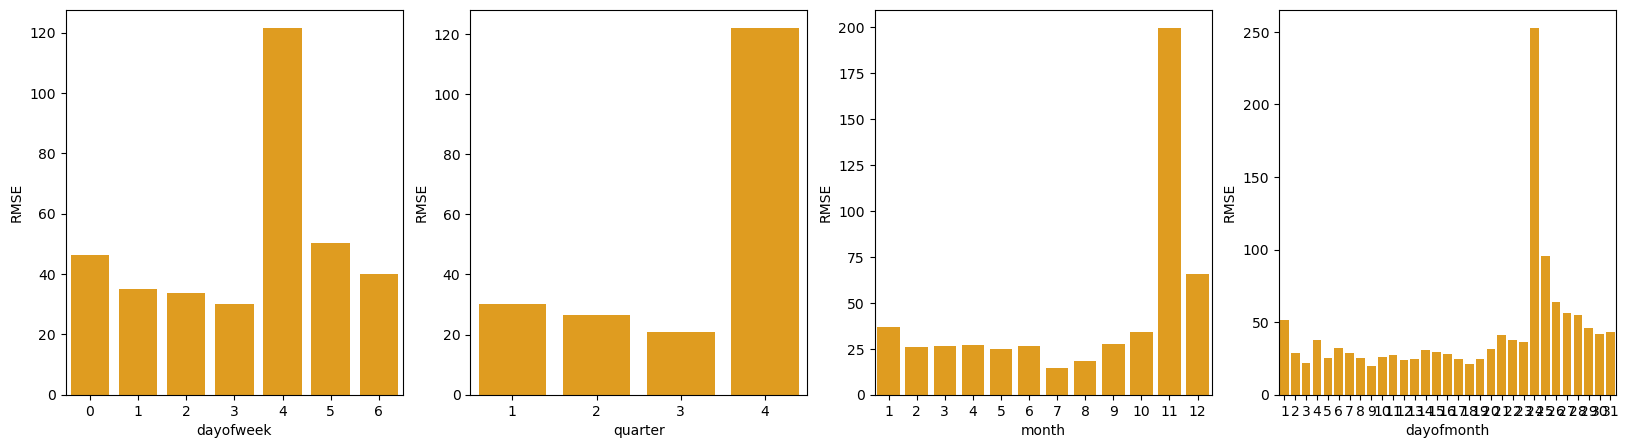

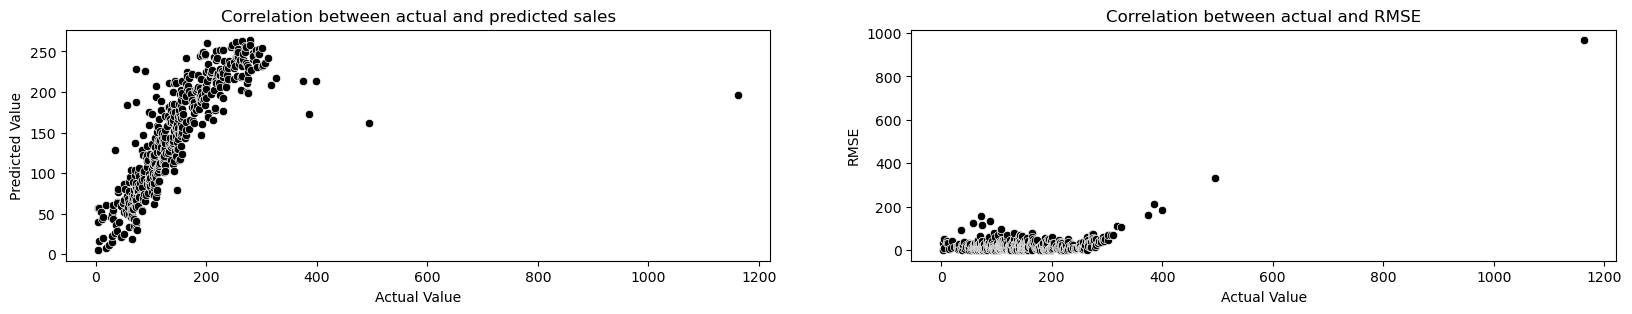

Test dataset evaluation
RMSE: 75.05191048122168


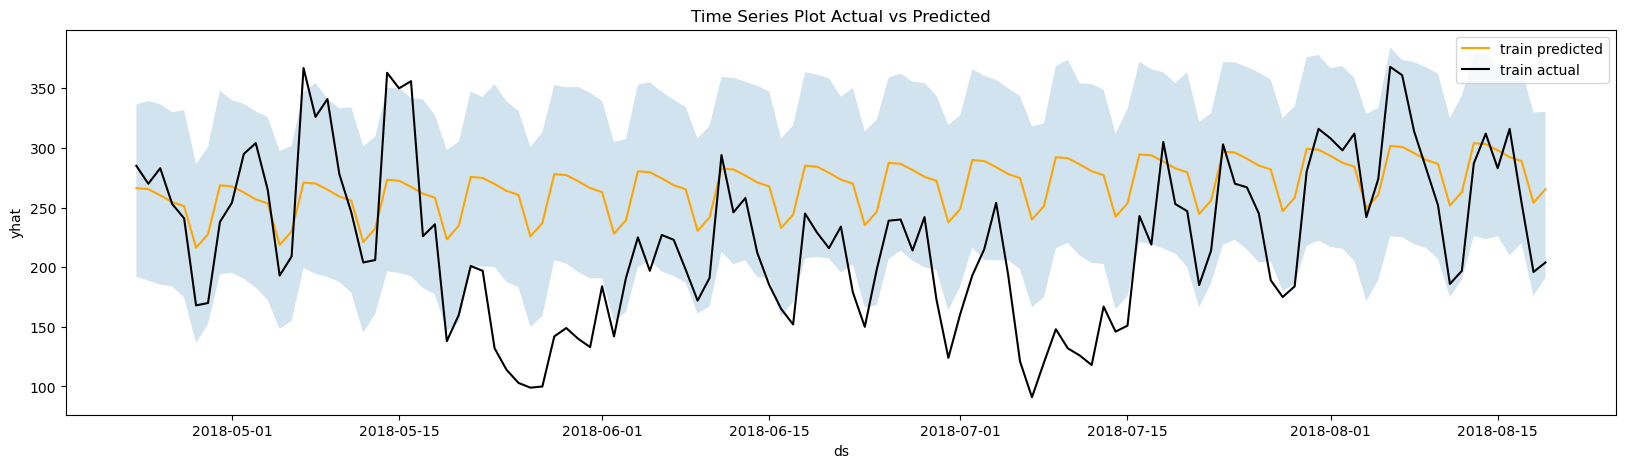

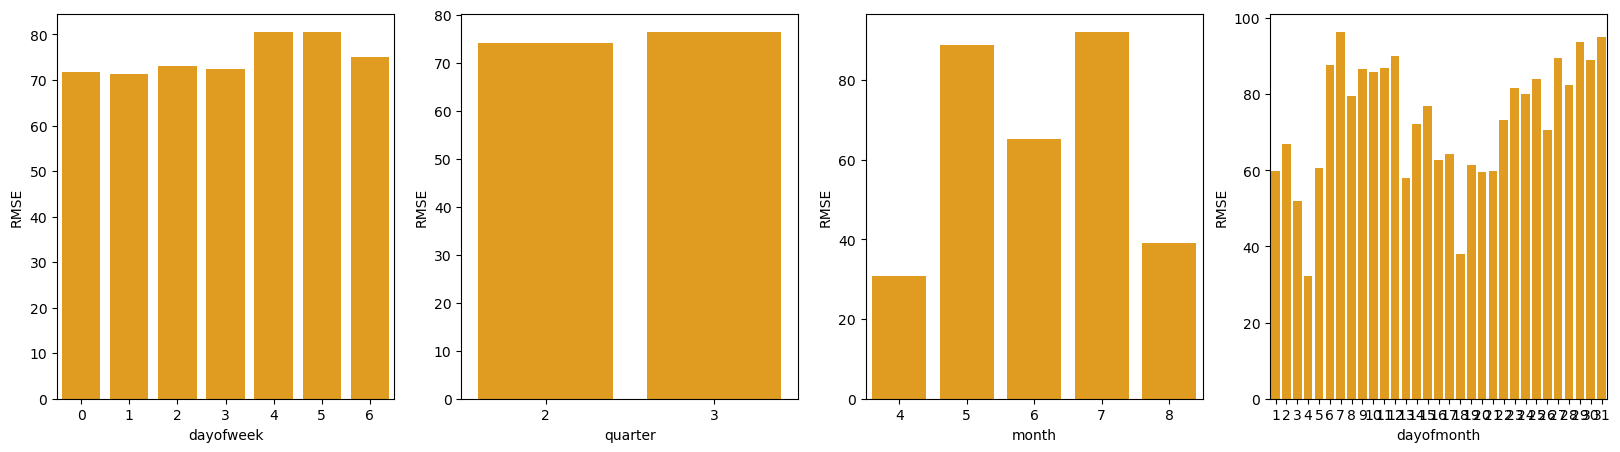

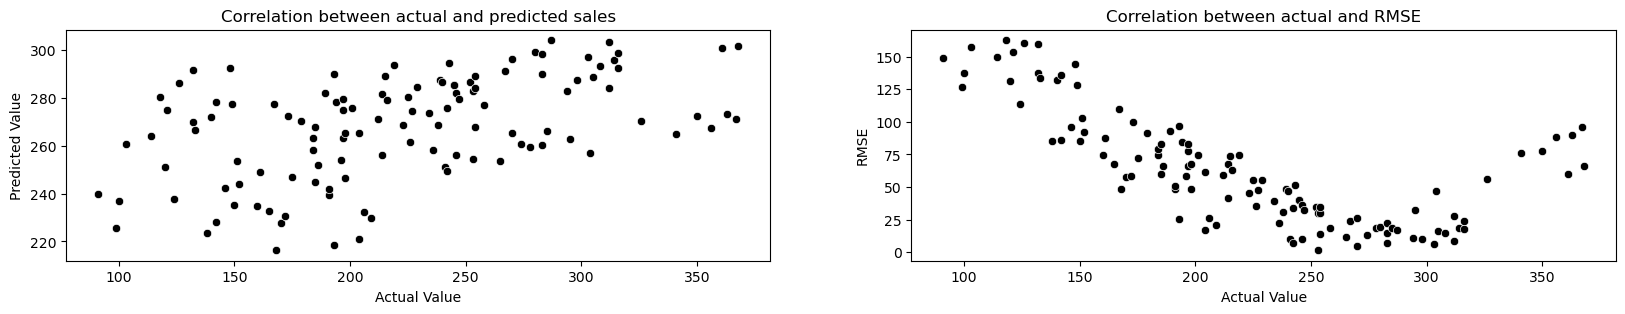

In [84]:
predict_eval(train, test, 'scaling')

15:53:27 - cmdstanpy - INFO - Chain [1] start processing
15:53:27 - cmdstanpy - INFO - Chain [1] done processing


Train dataset evaluation
RMSE: 37.44257946155065


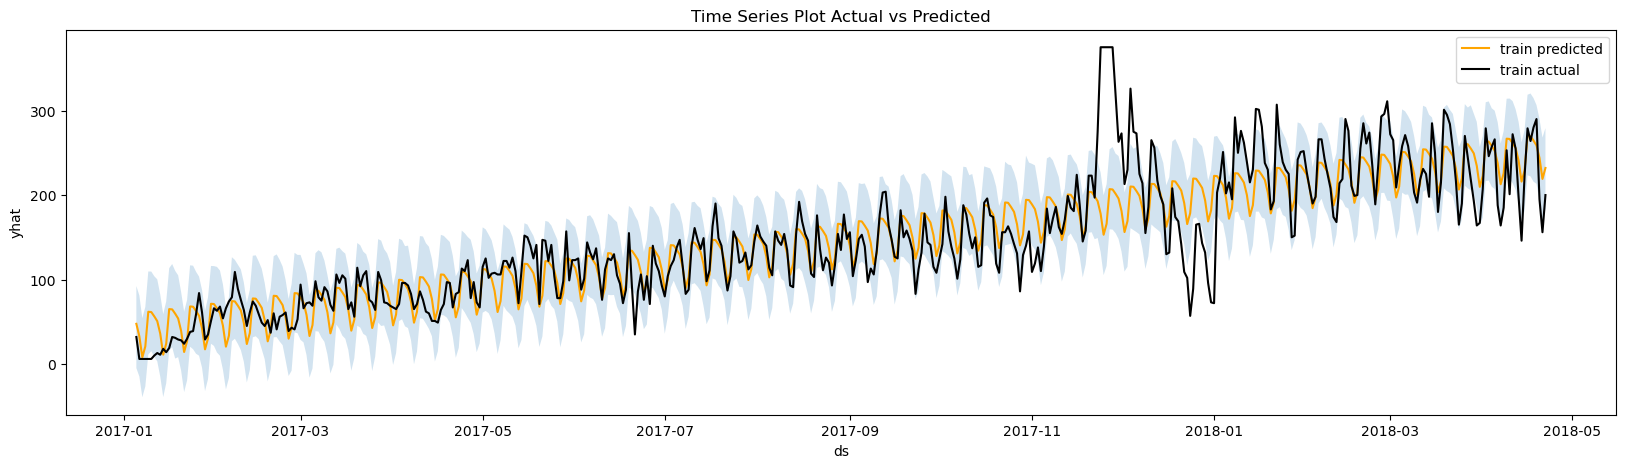

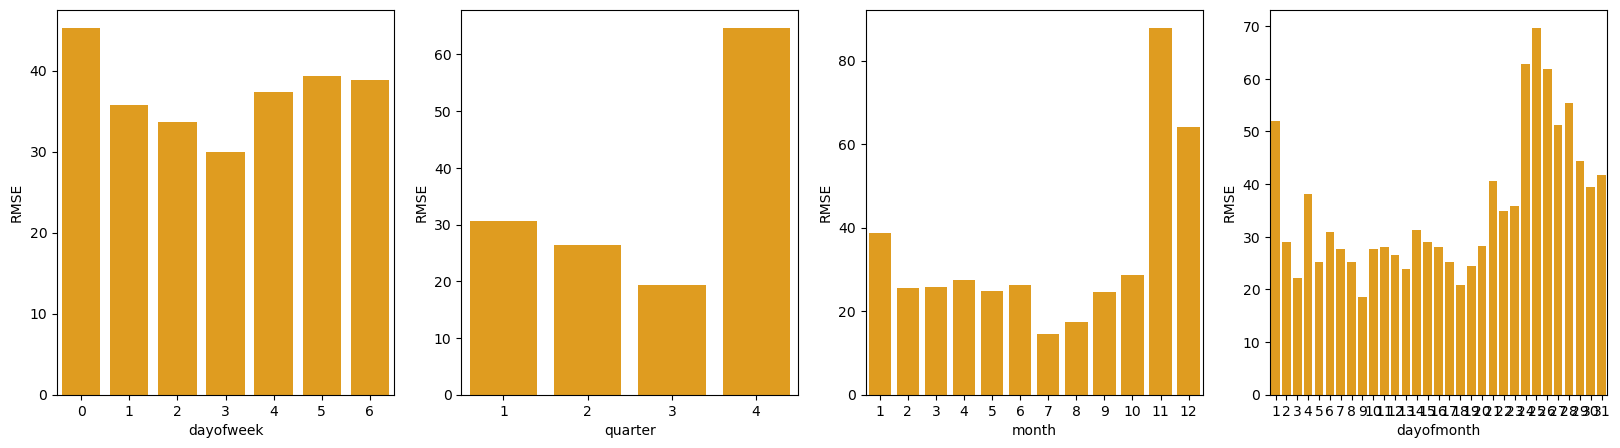

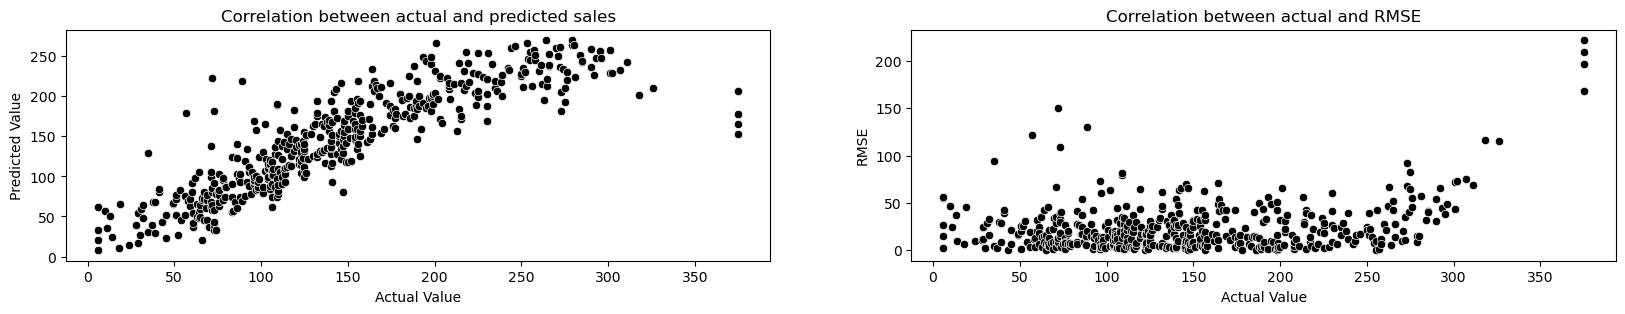

Test dataset evaluation
RMSE: 82.81494354882528


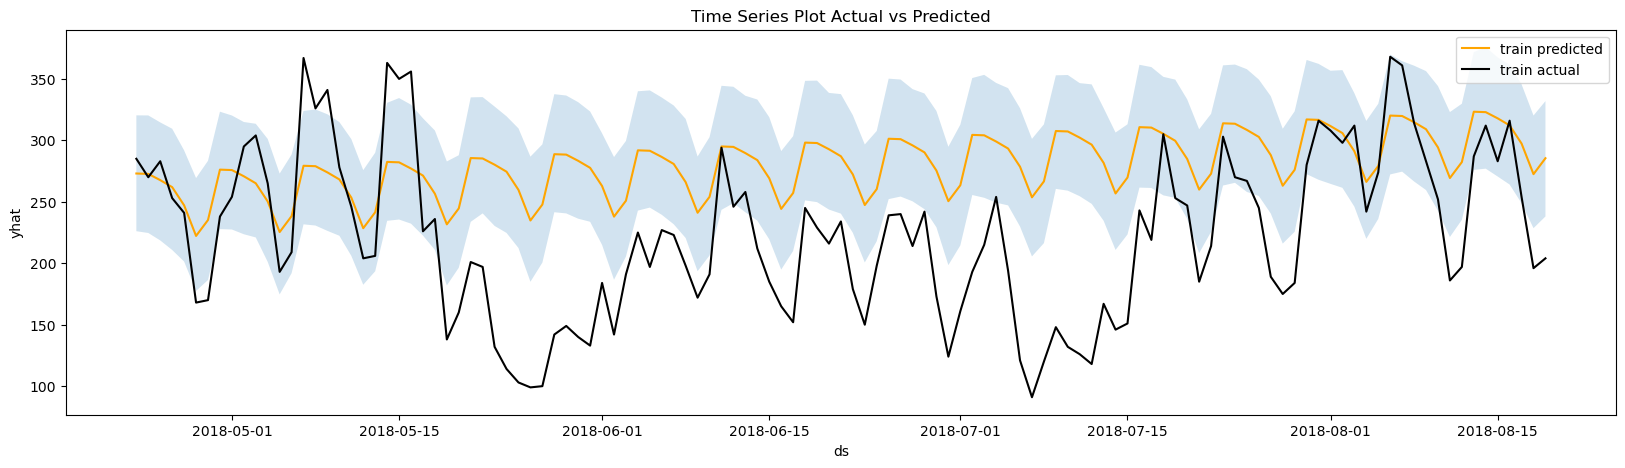

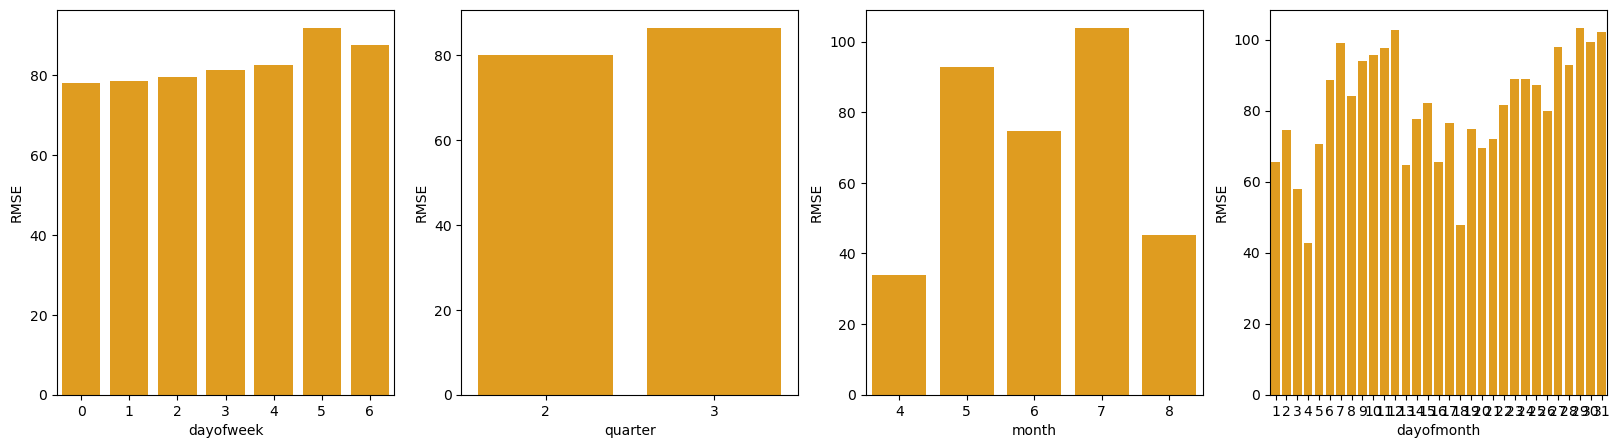

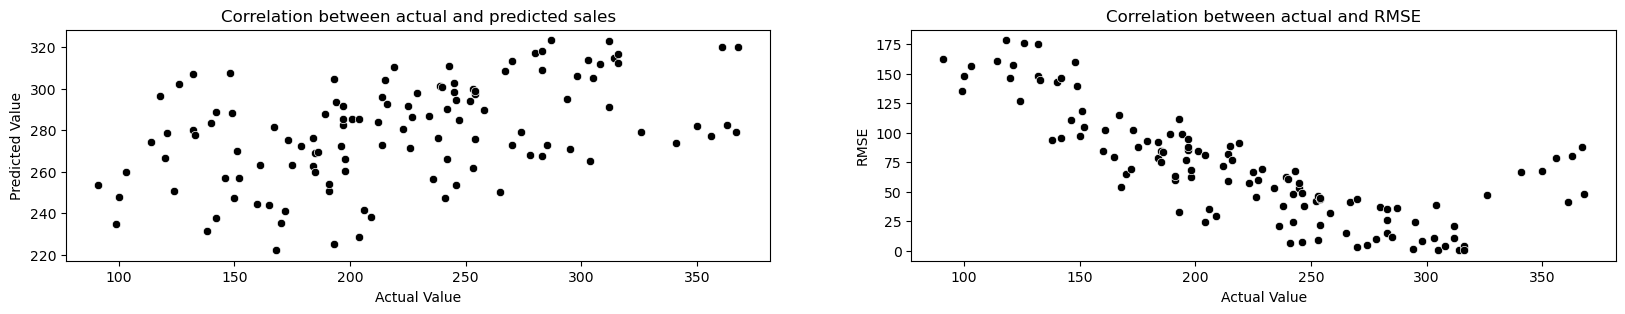

In [85]:
predict_eval(train, test, 'rmv_outliers')

### Hyperparamter Tuning

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}


16:08:46 - cmdstanpy - INFO - Chain [1] start processing
16:08:46 - cmdstanpy - INFO - Chain [1] done processing


Train dataset evaluation
RMSE: 60.02161636338016


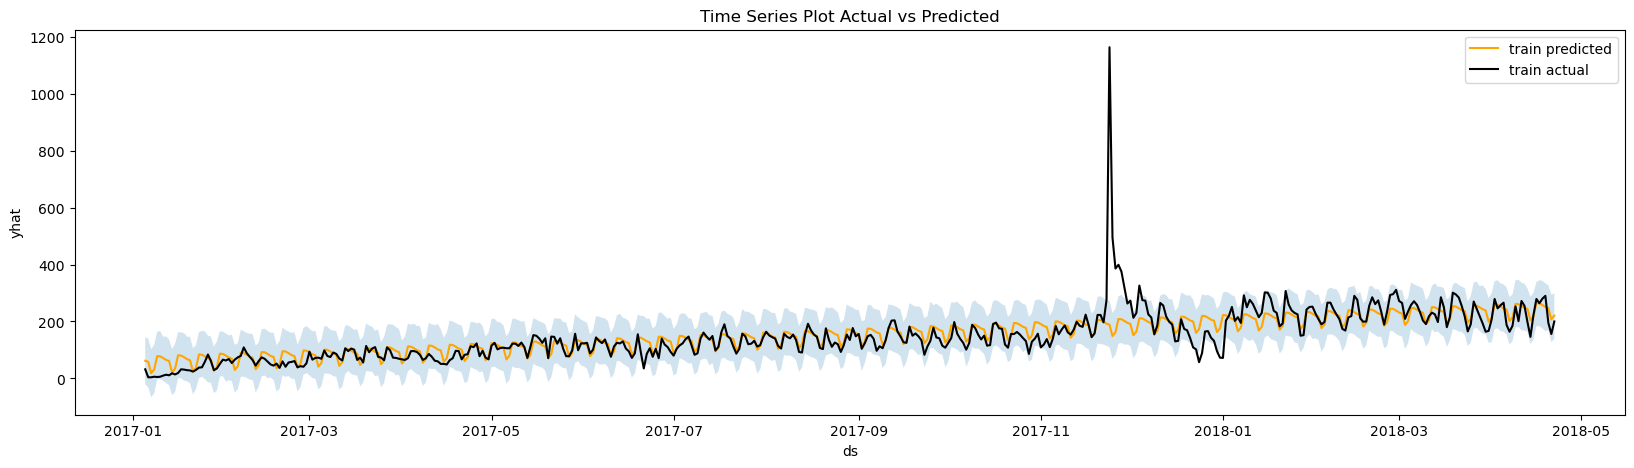

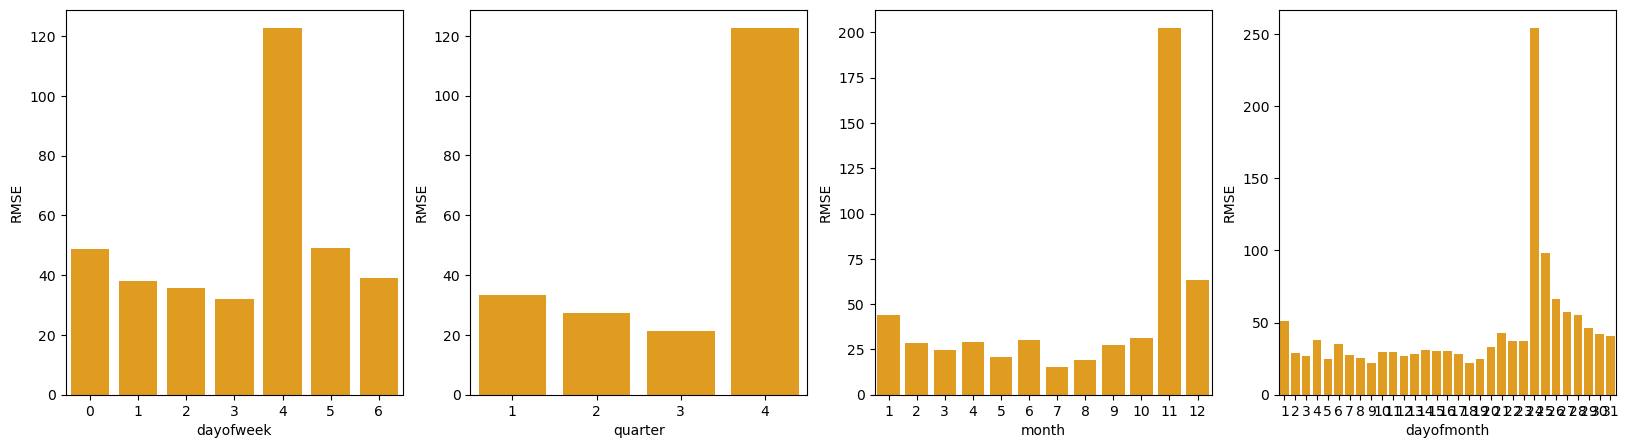

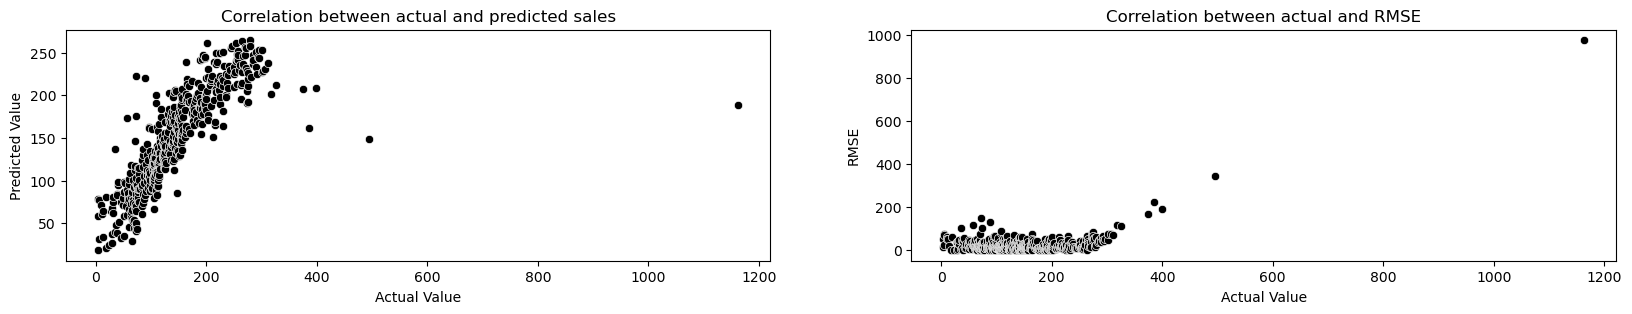

Test dataset evaluation
RMSE: 75.9060727414893


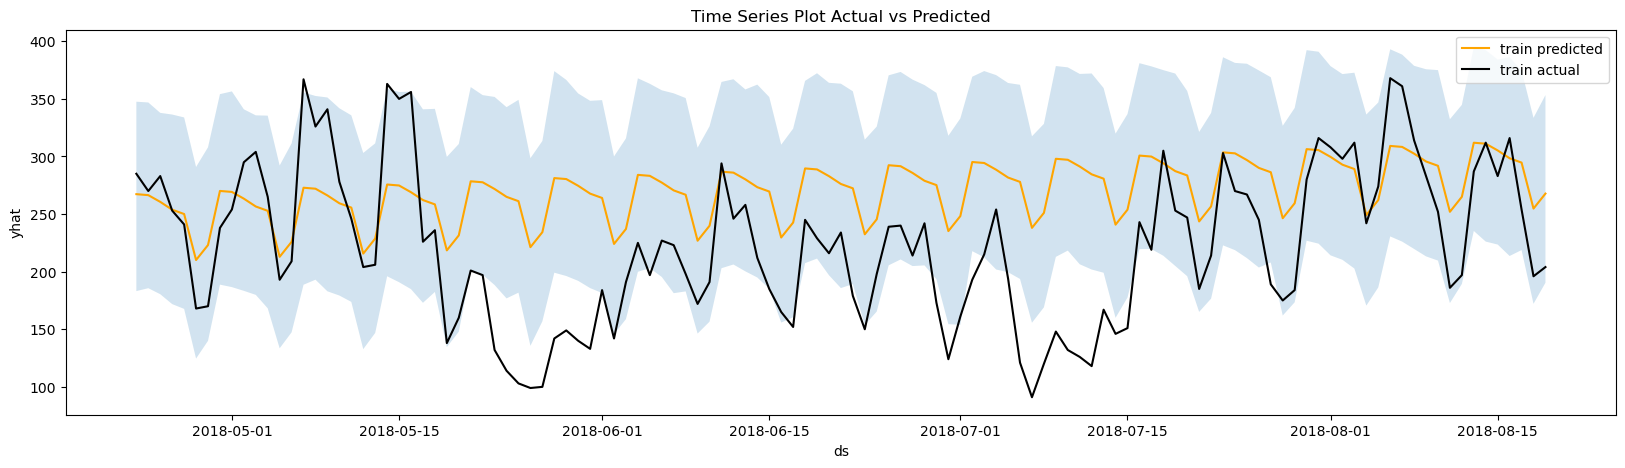

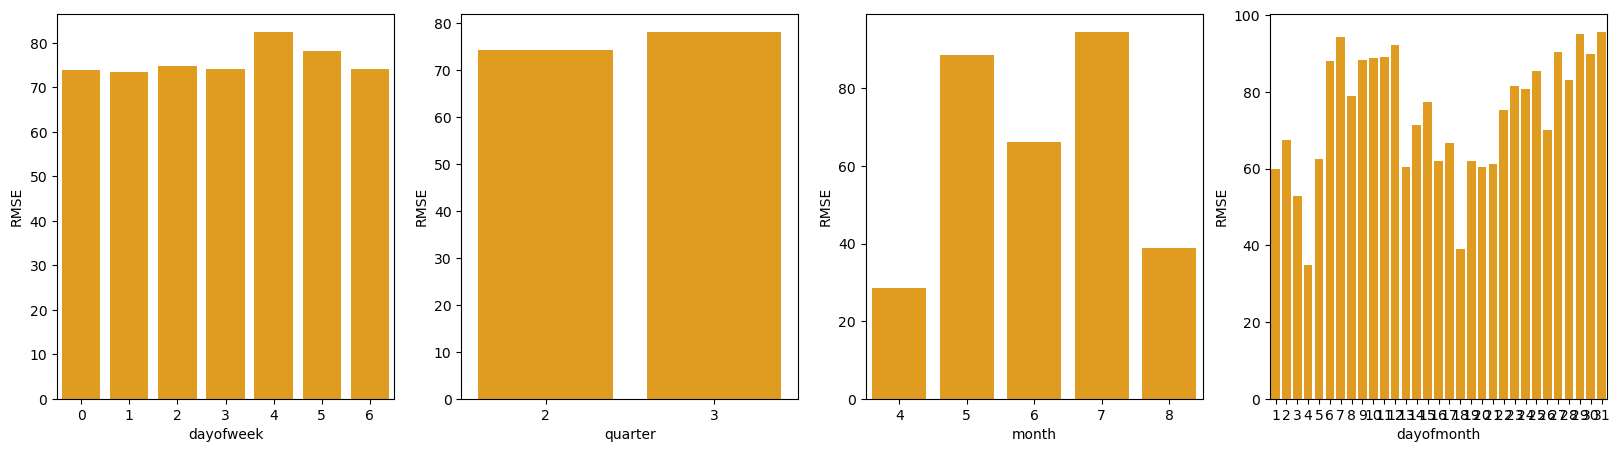

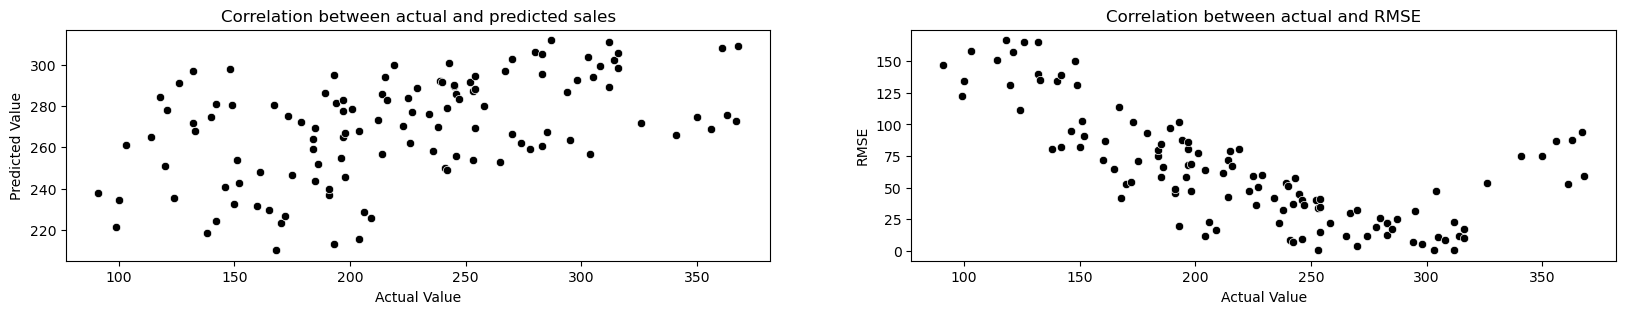

In [86]:
predict_eval(train, test, 'total_orders', tuning=True)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


16:25:47 - cmdstanpy - INFO - Chain [1] start processing
16:25:47 - cmdstanpy - INFO - Chain [1] done processing


Train dataset evaluation
RMSE: 58.92402710000278


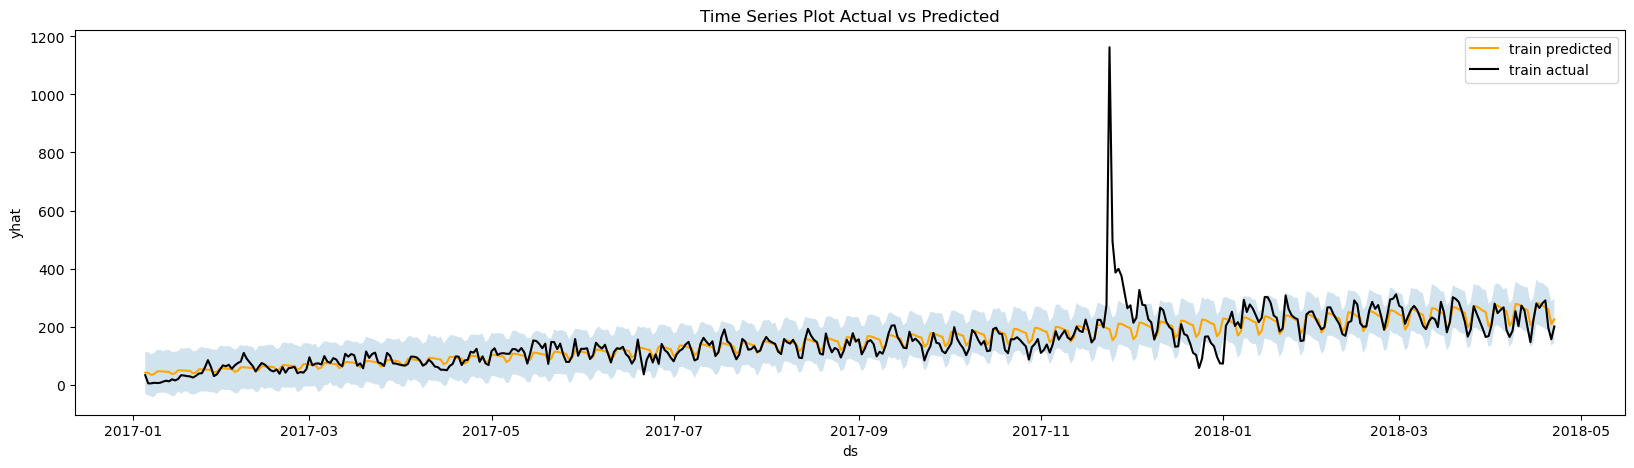

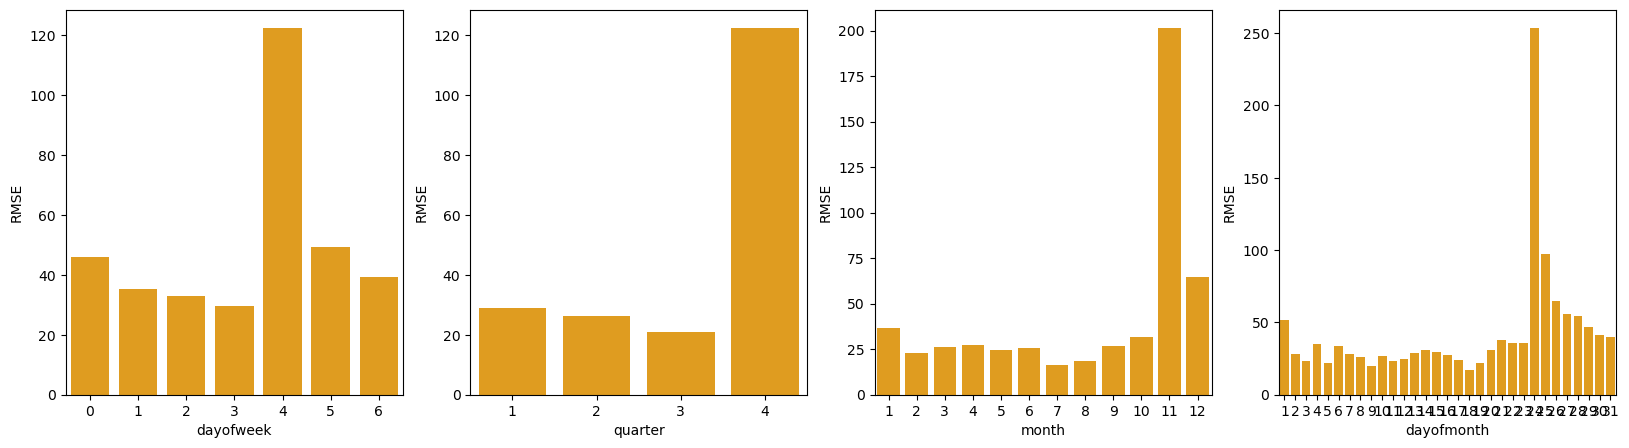

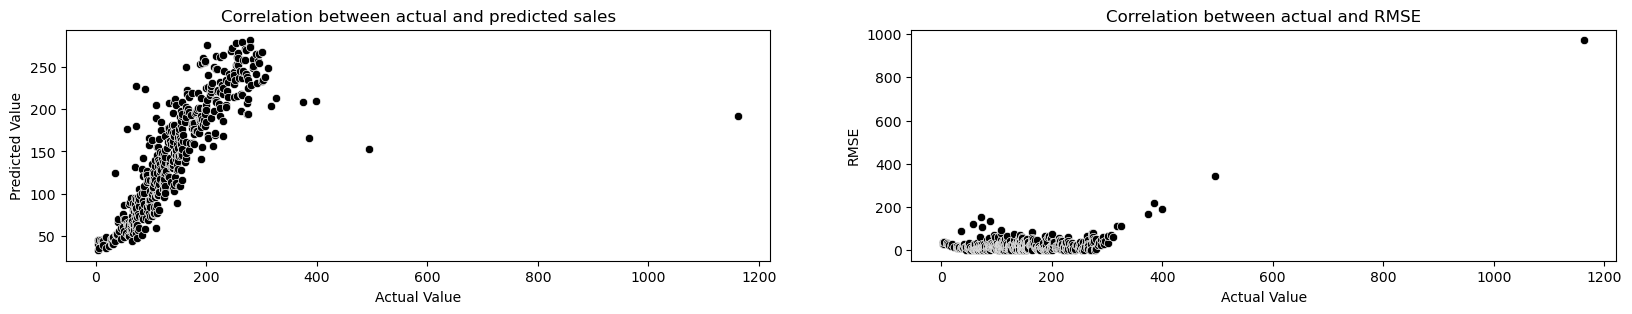

Test dataset evaluation
RMSE: 85.7796474799831


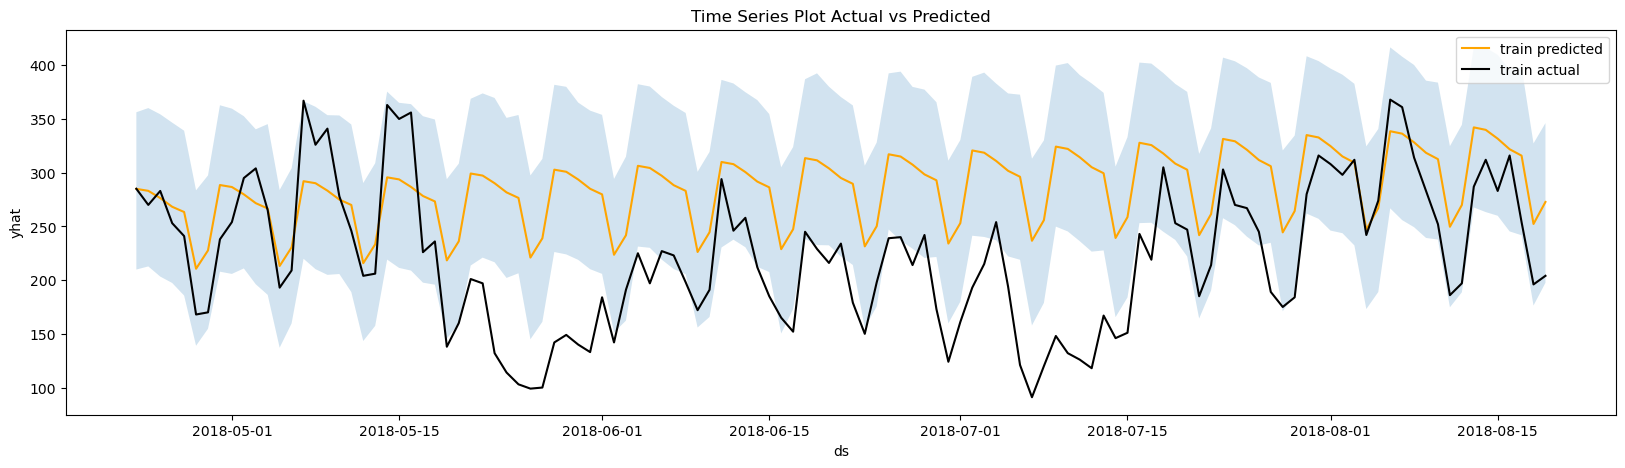

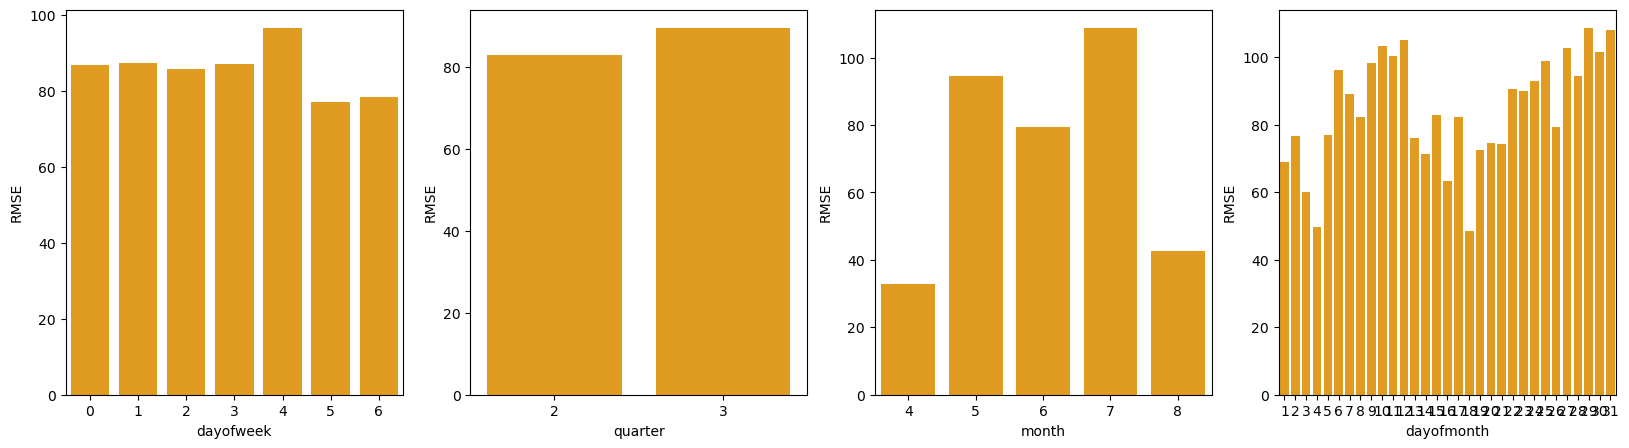

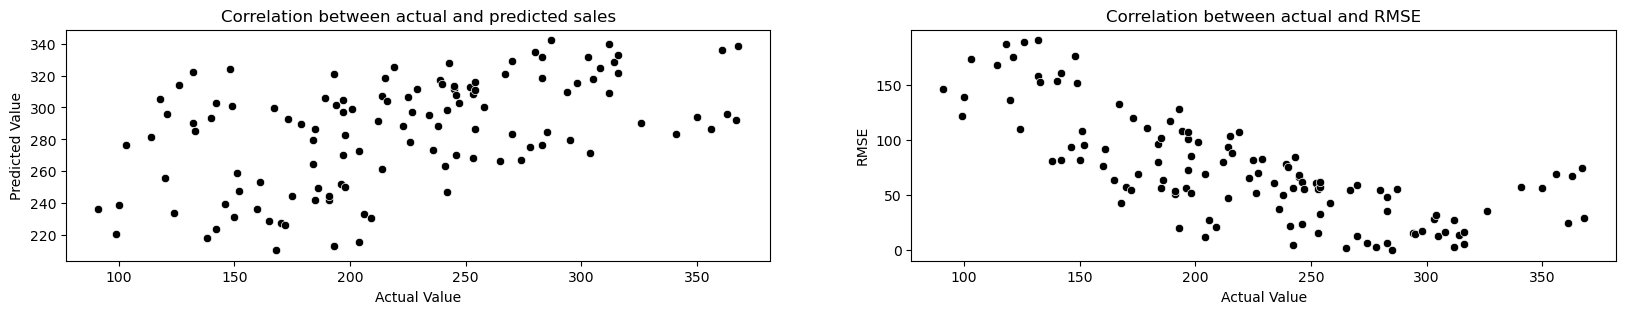

In [87]:
predict_eval(train, test, 'scaling', tuning=True)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


16:55:05 - cmdstanpy - INFO - Chain [1] start processing
16:55:05 - cmdstanpy - INFO - Chain [1] done processing


Train dataset evaluation
RMSE: 36.574536984685516


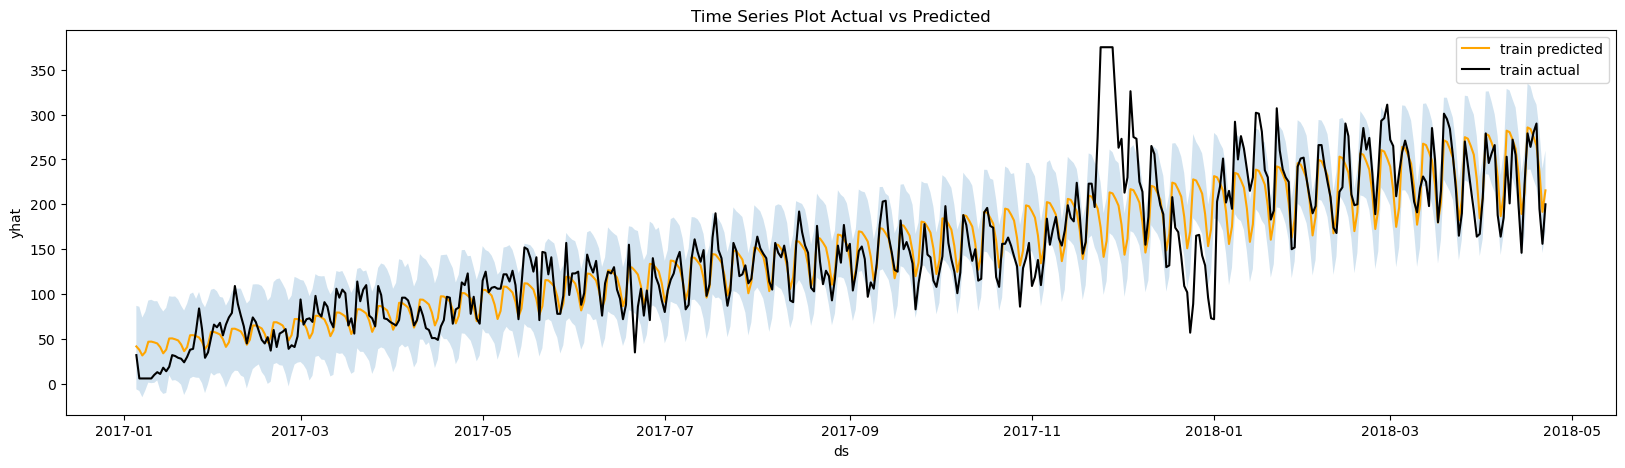

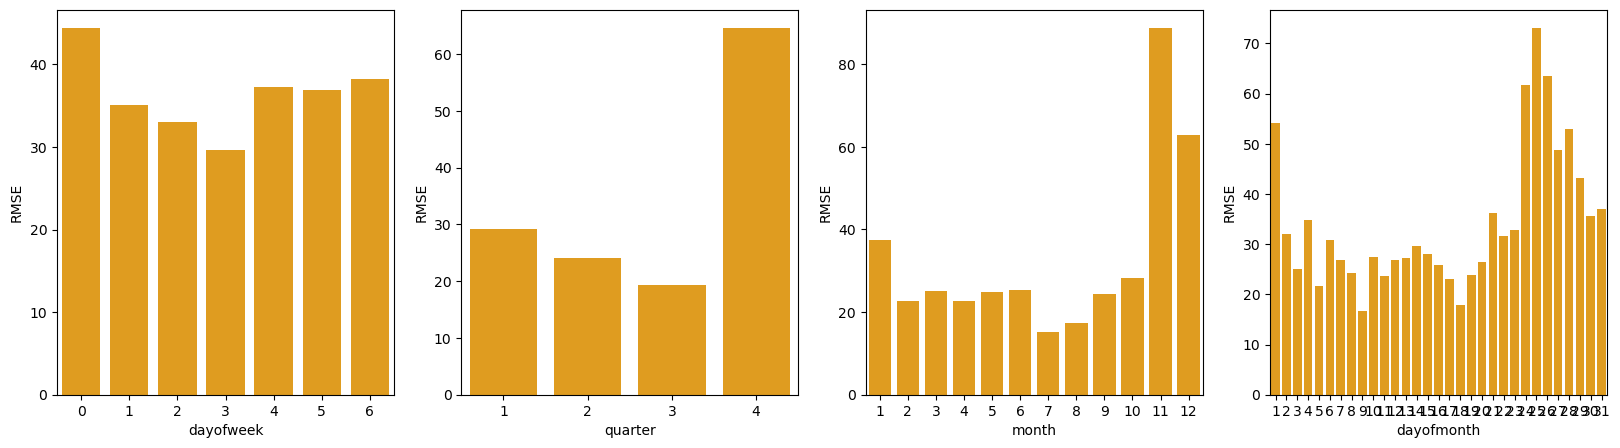

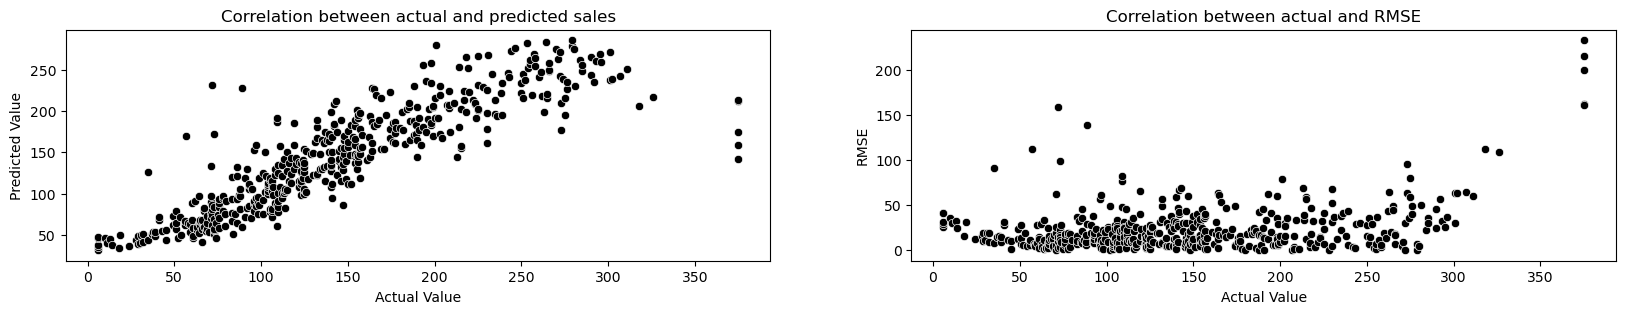

Test dataset evaluation
RMSE: 80.92247007399979


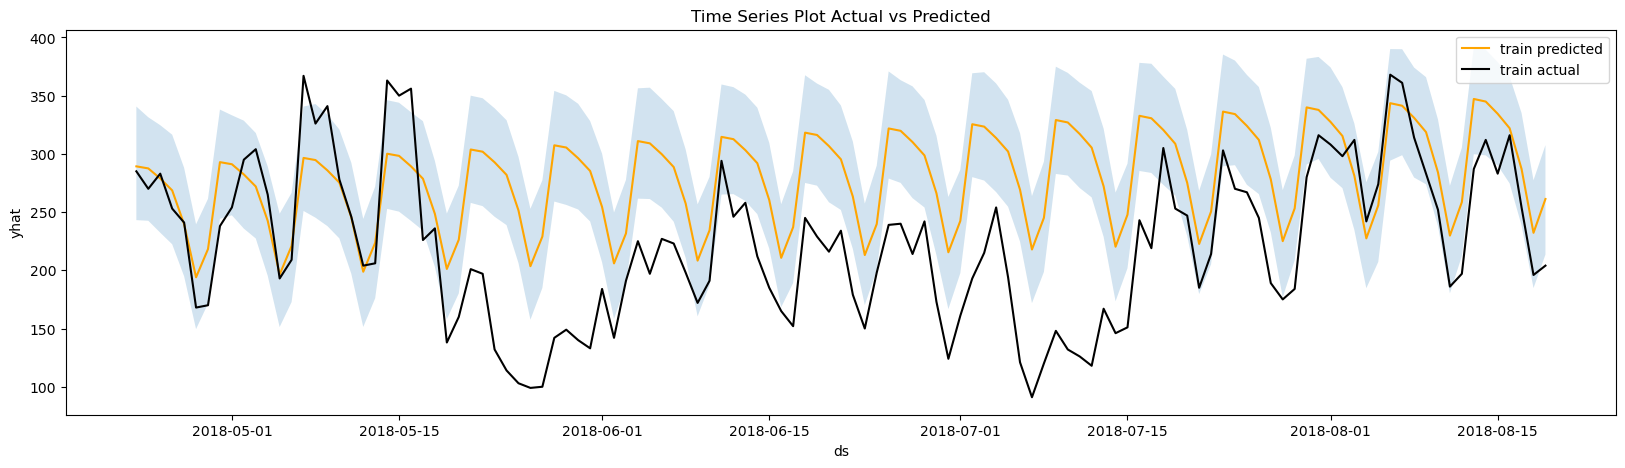

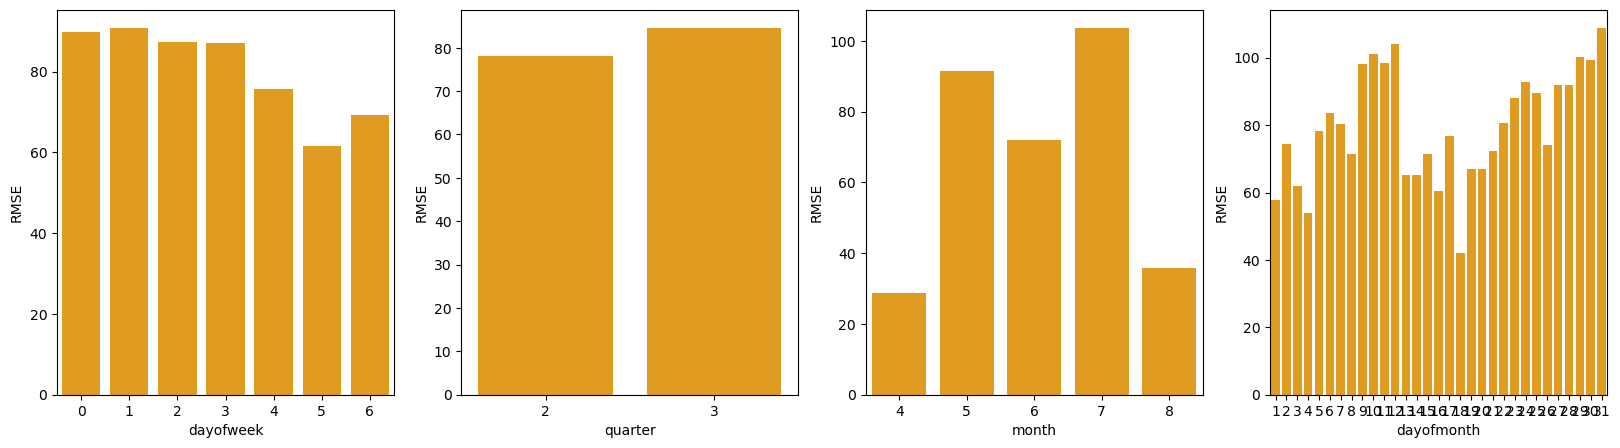

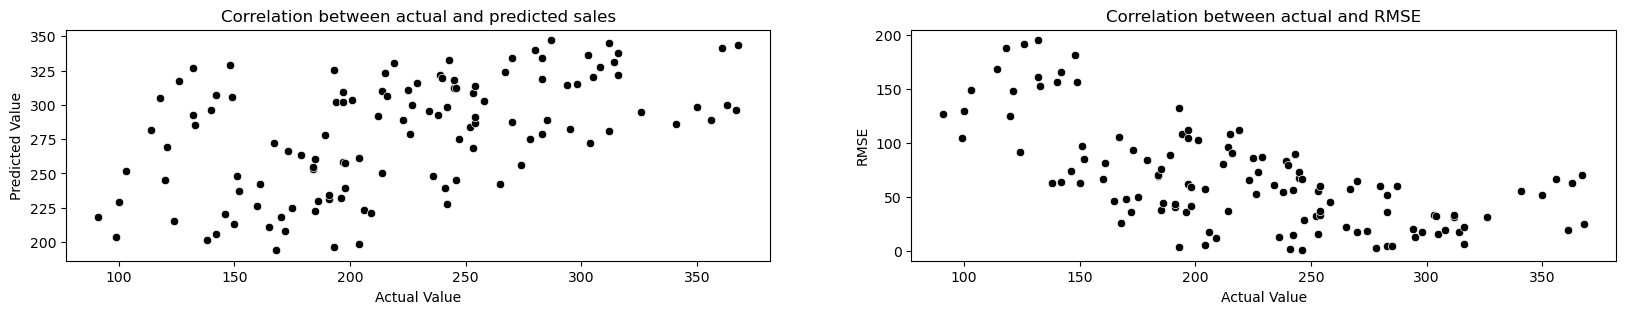

In [90]:
predict_eval(train, test, 'rmv_outliers', tuning = True)

## Giving Holiday Context

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive'}


18:08:43 - cmdstanpy - INFO - Chain [1] start processing
18:08:43 - cmdstanpy - INFO - Chain [1] done processing


Train dataset evaluation
RMSE: 22.388571165221286


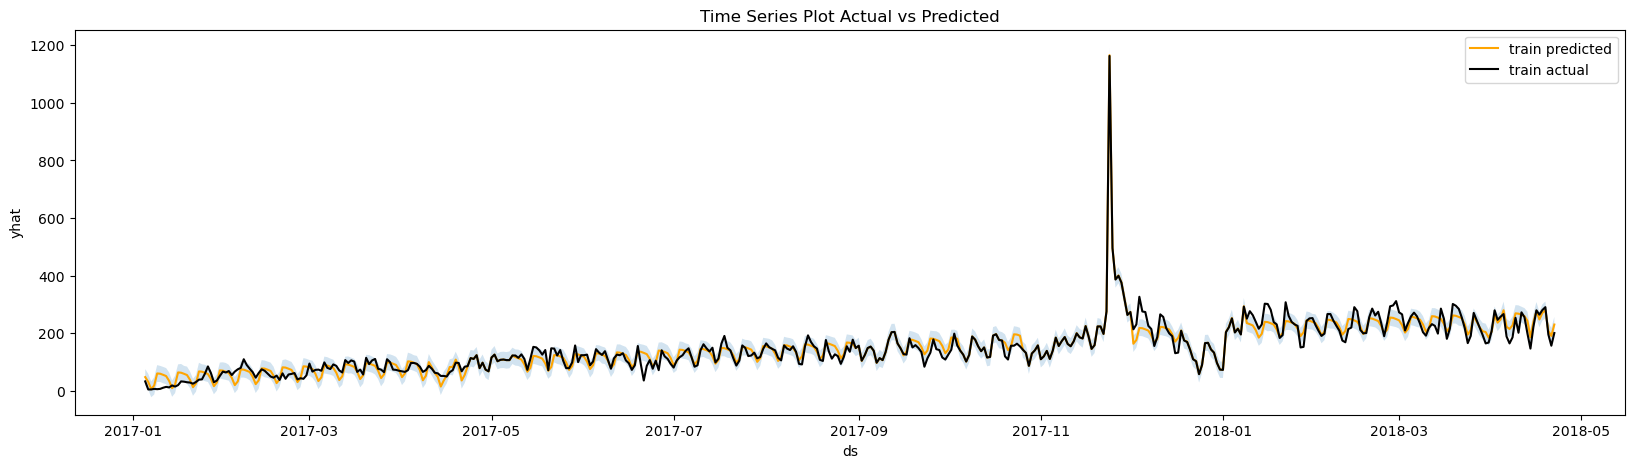

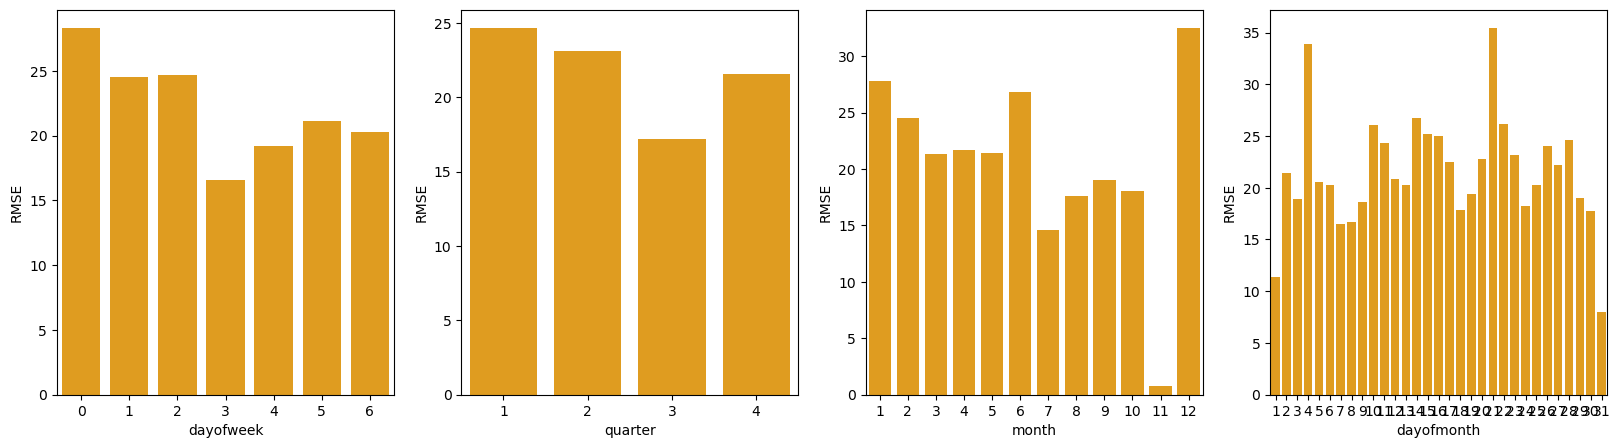

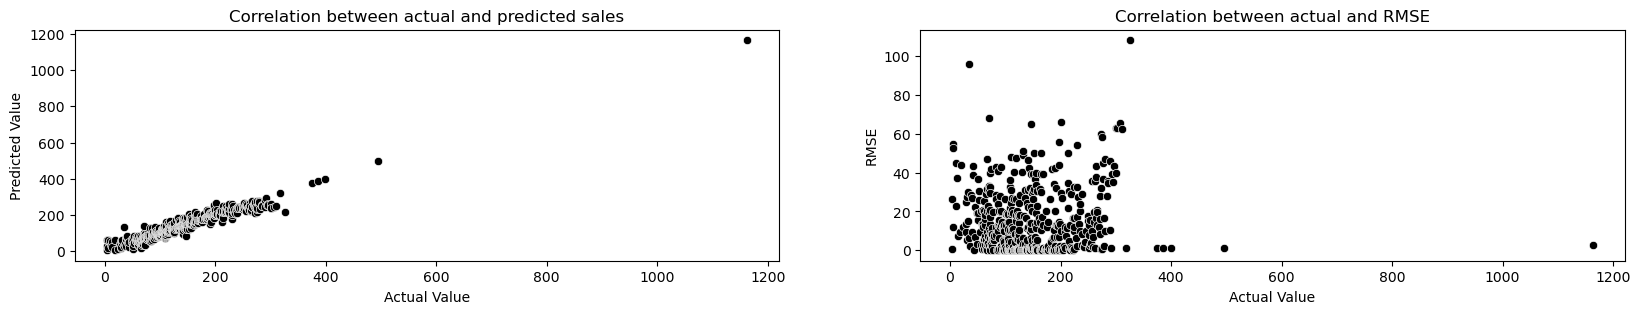

Test dataset evaluation
RMSE: 78.91292582203258


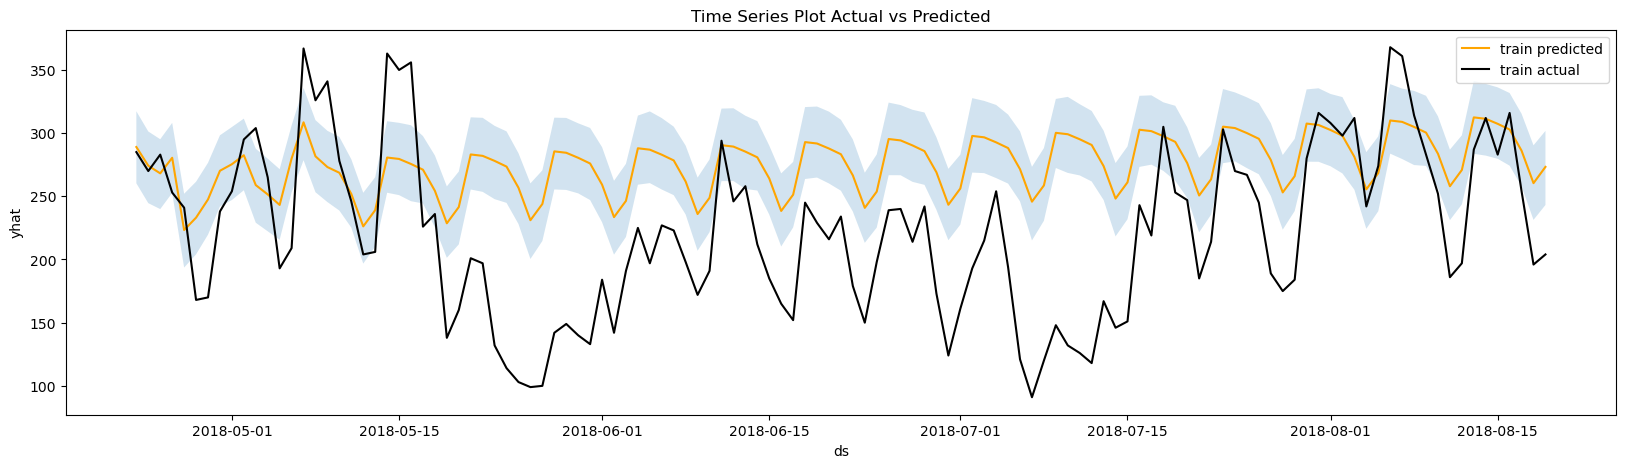

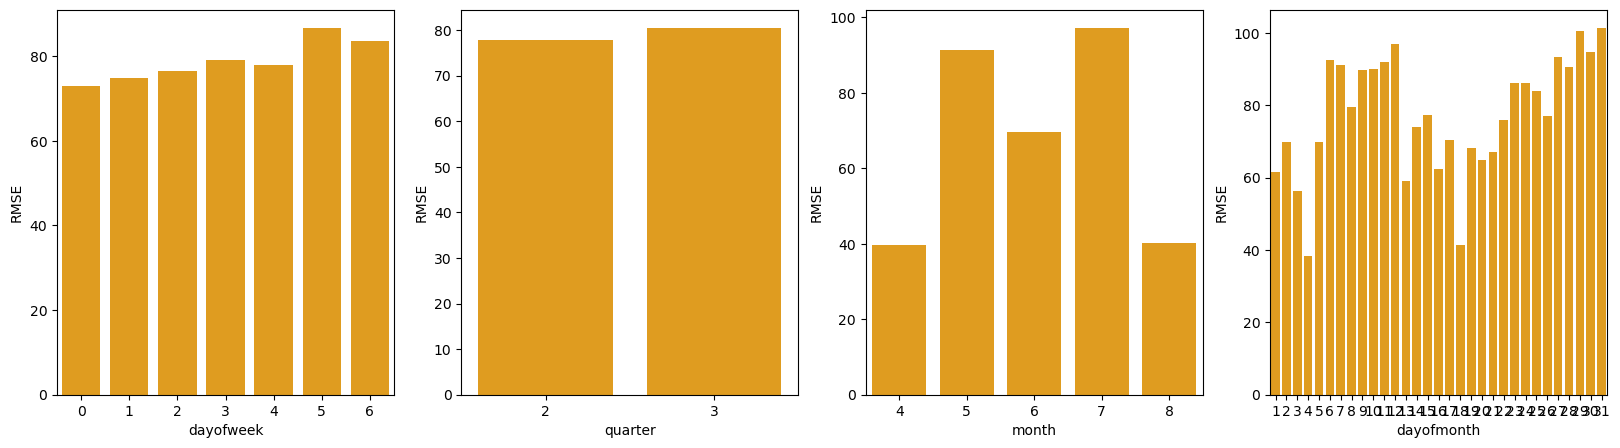

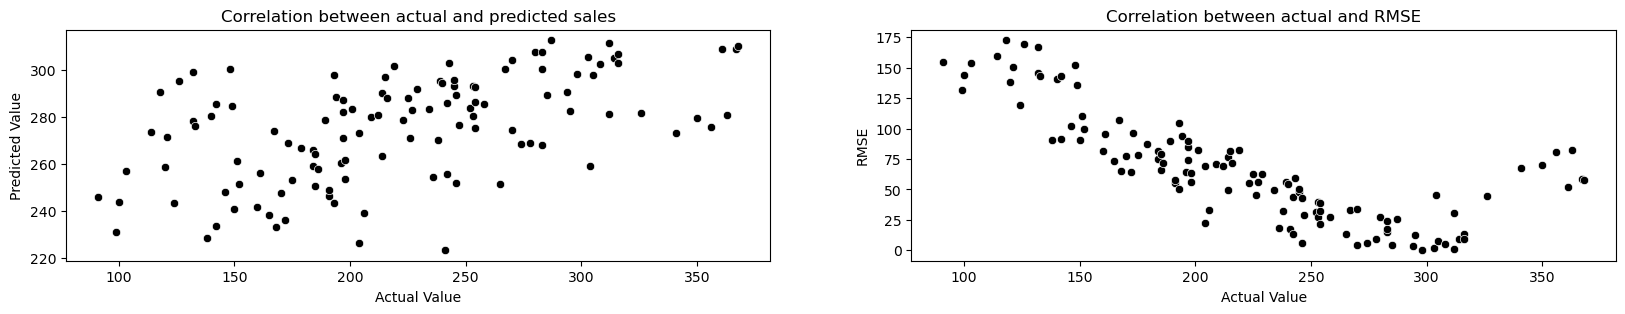

In [92]:
predict_eval(train, test, 'total_orders', tuning=True, holiday_context=True)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive'}


18:22:58 - cmdstanpy - INFO - Chain [1] start processing
18:22:58 - cmdstanpy - INFO - Chain [1] done processing


Train dataset evaluation
RMSE: 22.14724602855969


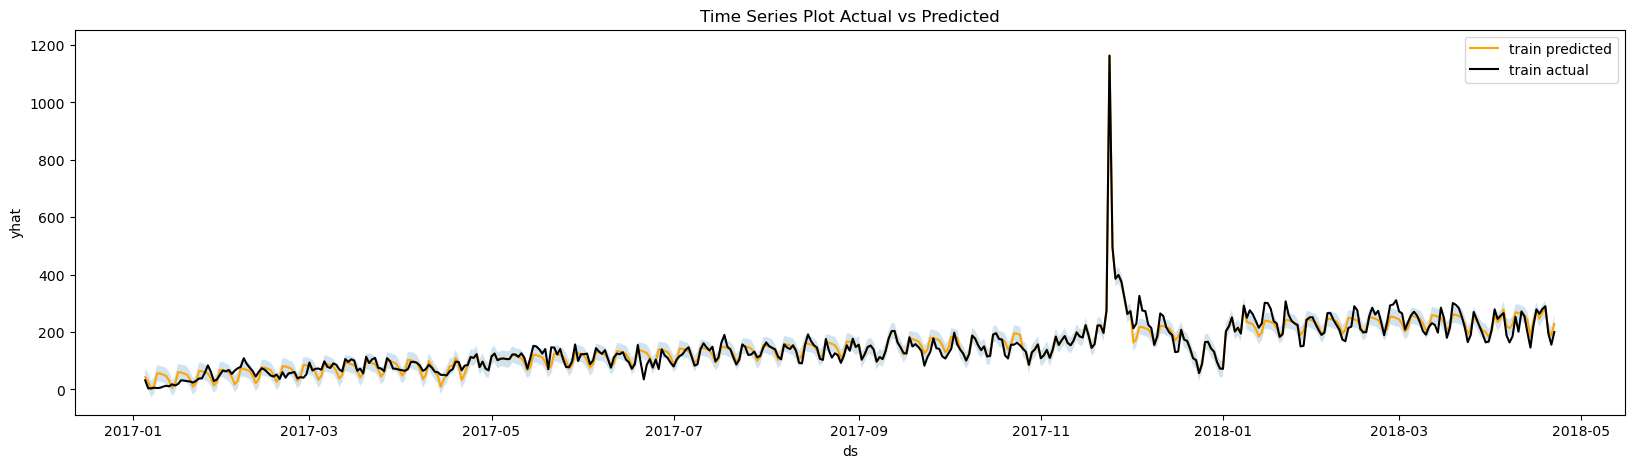

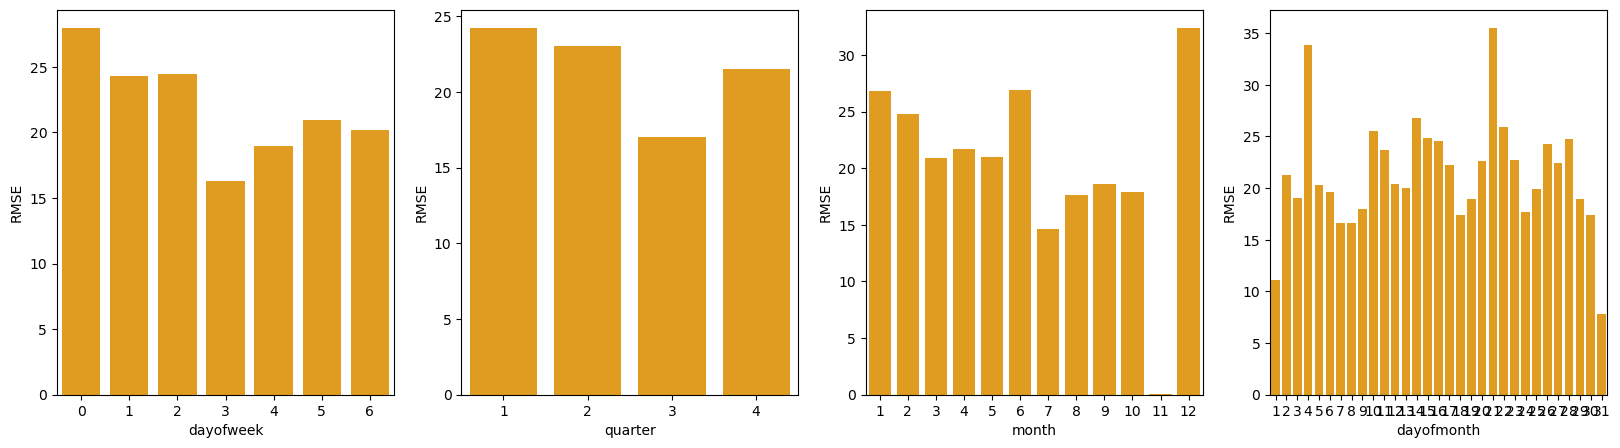

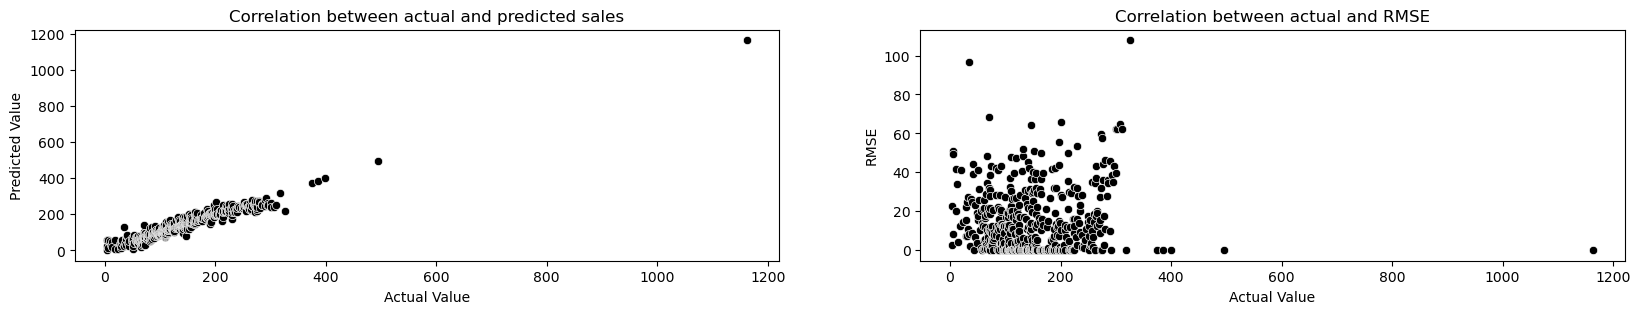

Test dataset evaluation
RMSE: 78.10697202163433


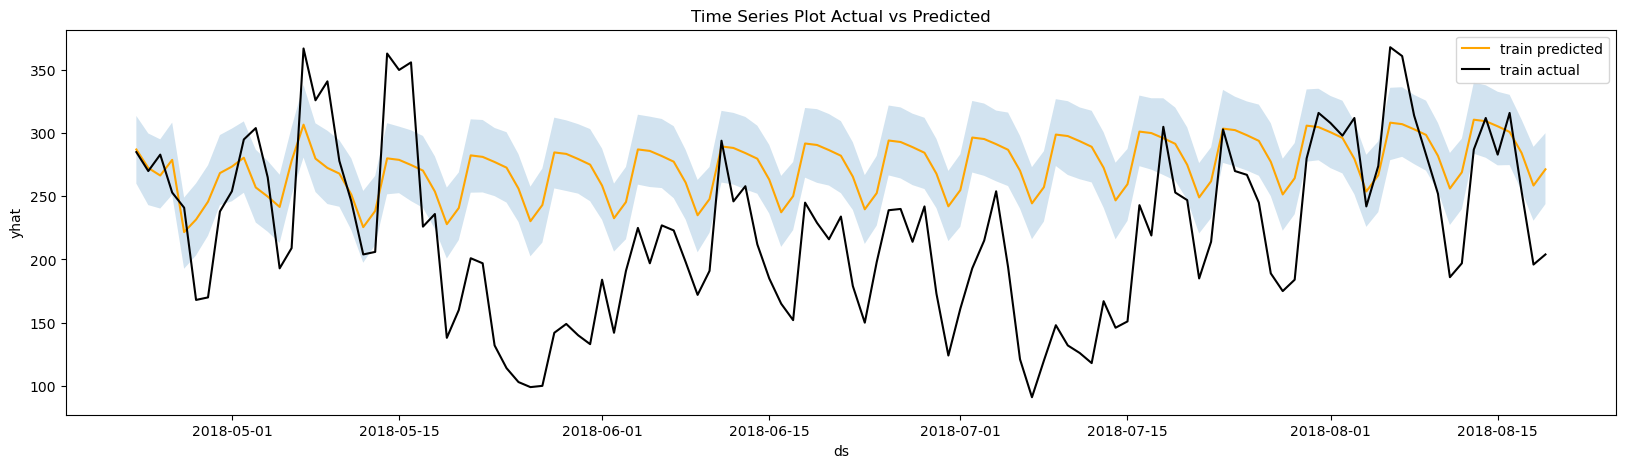

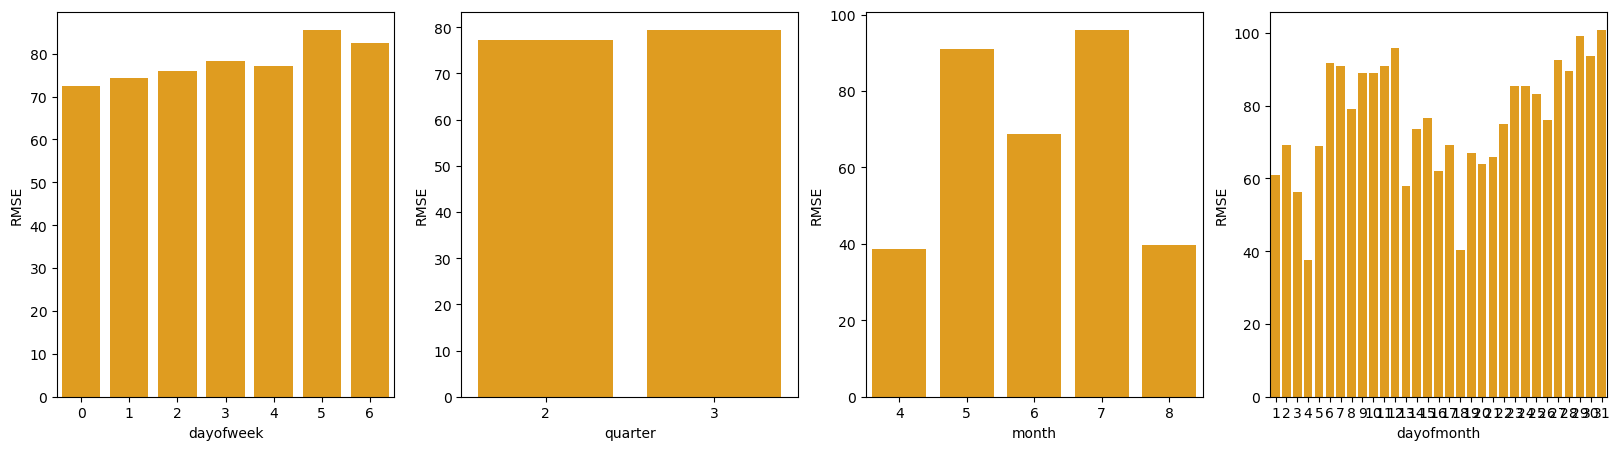

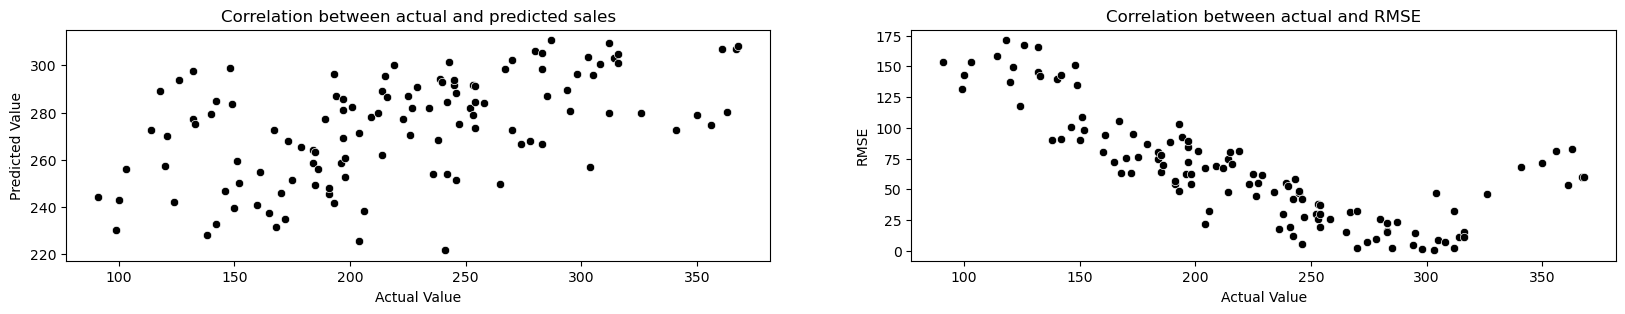

In [93]:
predict_eval(train, test, 'scaling', tuning=True, holiday_context=True)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


18:39:17 - cmdstanpy - INFO - Chain [1] start processing
18:39:17 - cmdstanpy - INFO - Chain [1] done processing


Train dataset evaluation
RMSE: 22.436647569109827


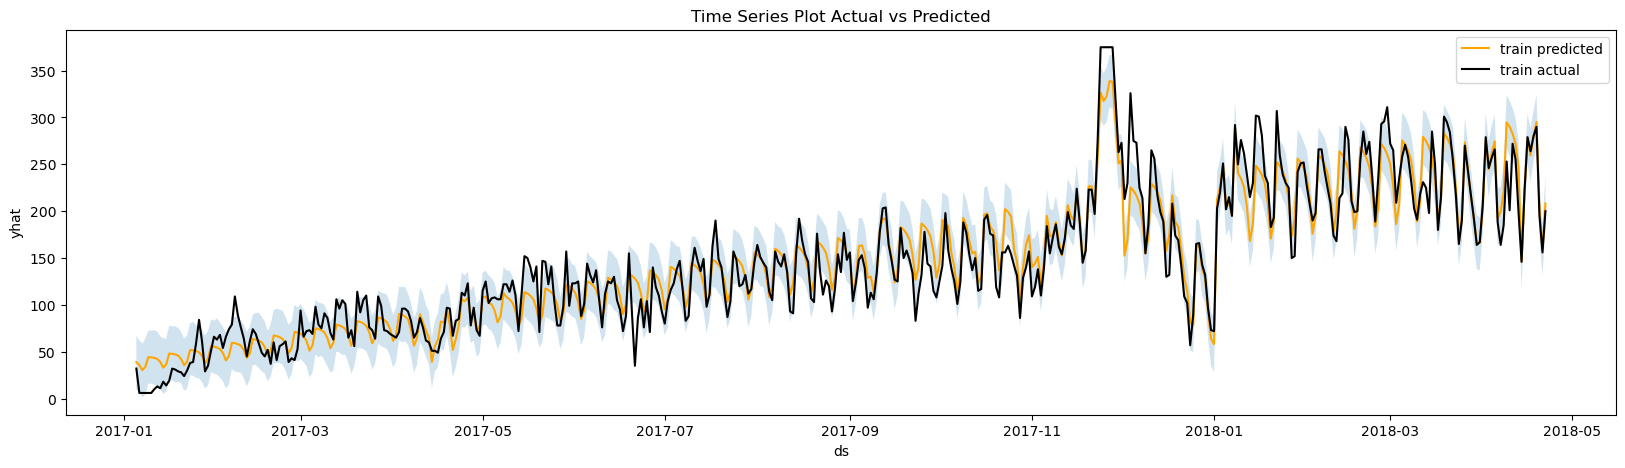

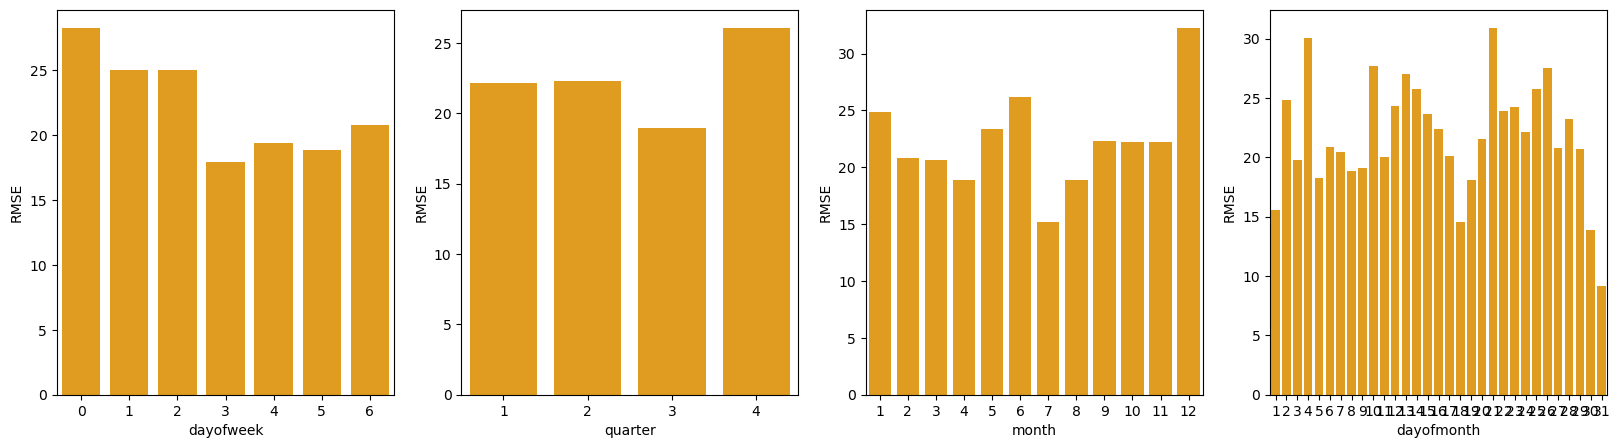

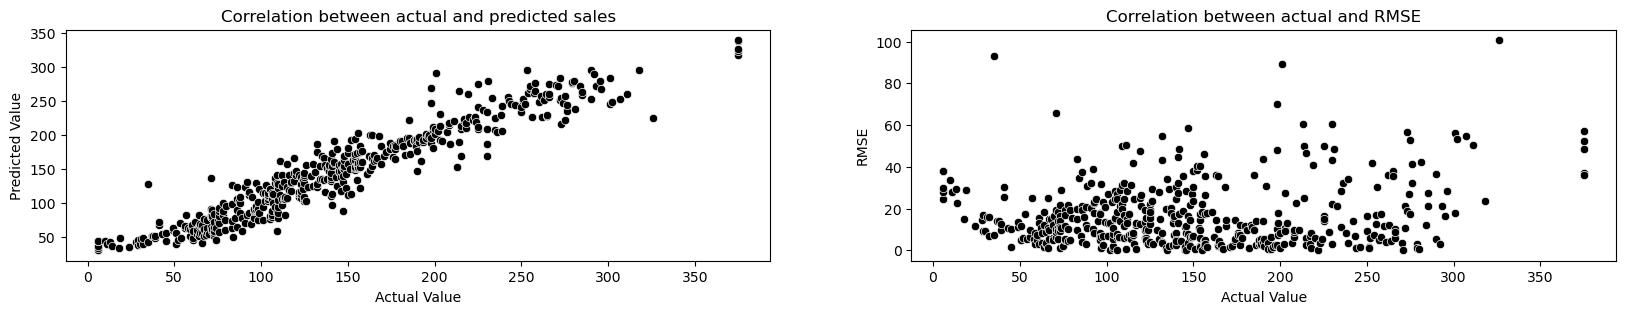

Test dataset evaluation
RMSE: 91.24806302933241


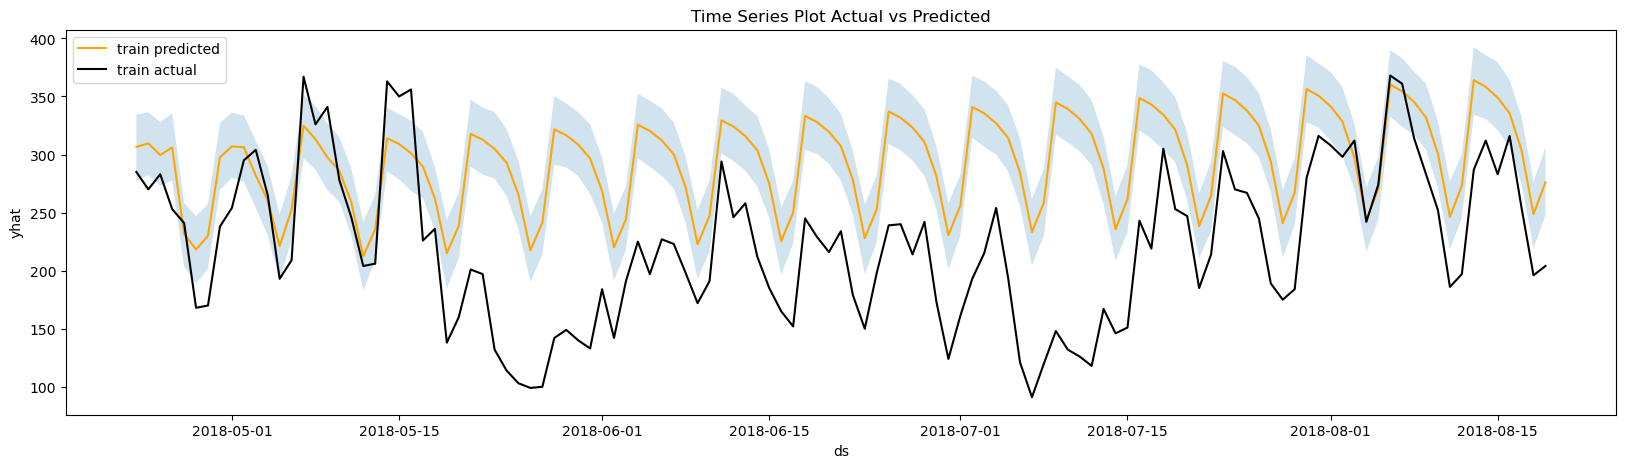

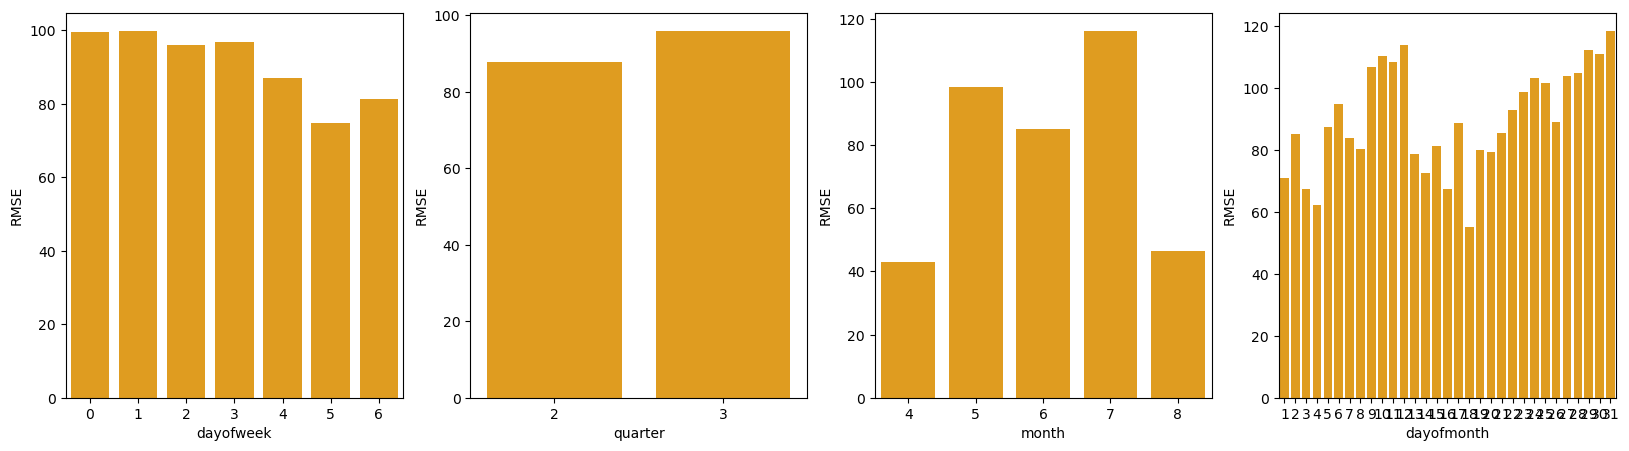

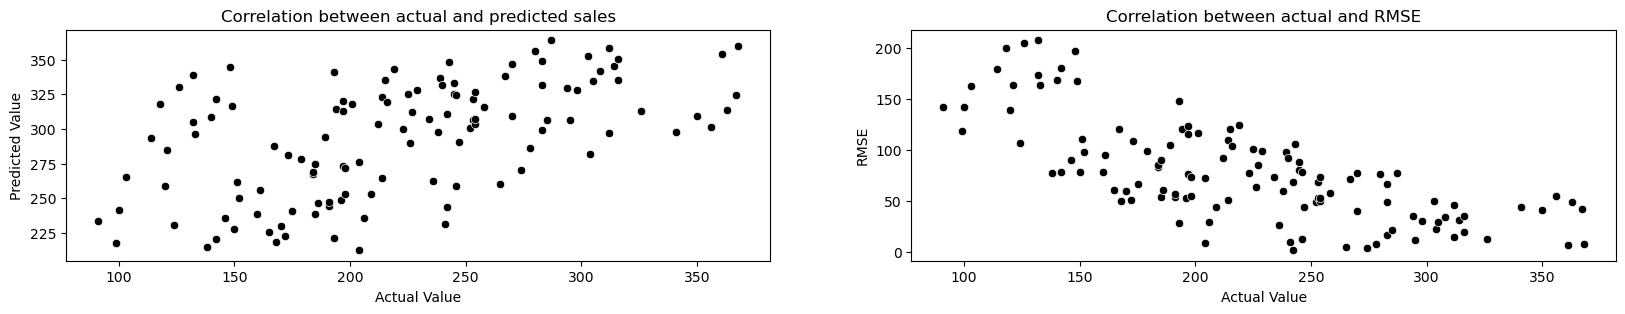

In [94]:
predict_eval(train, test, 'rmv_outliers', tuning=True, holiday_context=True)

In [95]:
df = orders.copy()
df['monthdate'] = df['month'].astype(str) + df['dayofmonth'].astype(str)

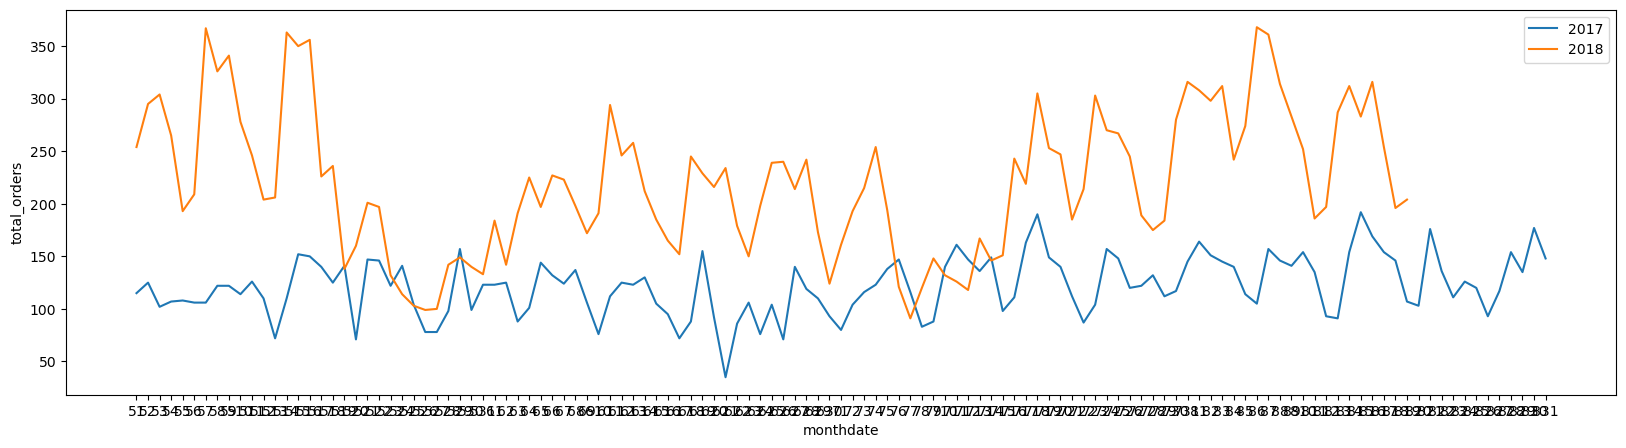

In [97]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[(df['month'].isin([5, 6, 7, 8])) & (df['year']==2017)], x='monthdate', y='total_orders', label='2017')
sns.lineplot(data=df[(df['month'].isin([5, 6, 7, 8])) & (df['year']==2018)], x='monthdate', y='total_orders', label='2018')
plt.show()